# Jai shree ram 🙏

## 1. Setup and Directory Check
We start by importing necessary libraries and verifying our data directory exists.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

# Define the data directory
DATA_DIR = "data/raw"

# Check if directory exists
if os.path.exists(DATA_DIR):
    print(f"✅ Found directory: {DATA_DIR}")
    print(f"📂 Files inside: {os.listdir(DATA_DIR)}")
else:
    print(f"❌ Directory not found: {DATA_DIR}")

✅ Found directory: data/raw
📂 Files inside: ['.ipynb_checkpoints', 'Damage Propagation Modeling.pdf', 'readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.csv', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt', 'x.txt']


## 2. Column Name Definitions
The dataset has no headers, so we define them manually:
- **Train/Test files:** 26 columns (unit_id, time, 3 operational settings, 21 sensors)
- **RUL files:** 1 column (remaining useful life in cycles)

In [3]:
# Define column names for train/test files (26 columns total)
TRAIN_TEST_COLS = [
    'unit_id', 'time',
    'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
    'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
    'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
    'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
    'sensor_21'
]

# Define column name for RUL files (1 column)
RUL_COLS = ['RUL']

print(f"✅ Train/Test columns: {len(TRAIN_TEST_COLS)} columns defined")
print(f"✅ RUL columns: {len(RUL_COLS)} column defined")

✅ Train/Test columns: 26 columns defined
✅ RUL columns: 1 column defined


## 3. TXT to CSV Conversion Function
We create a reusable function that:
1. Reads space-separated .txt files using pandas
2. Assigns proper column headers
3. Saves as .csv format
4. Returns the dataframe for inspection


In [3]:
# Create processed directory for CSV files
PROCESSED_DIR = "data/processed"
os.makedirs(PROCESSED_DIR, exist_ok=True)
print(f"✅ Created/verified directory: {PROCESSED_DIR}")

def txt_to_csv(txt_filename, csv_filename, columns, input_dir=DATA_DIR, output_dir=PROCESSED_DIR):
    """
    Convert a space-separated .txt file to .csv with proper headers.
    
    Parameters:
    - txt_filename: name of the input .txt file (in data/raw)
    - csv_filename: name of the output .csv file (saved to data/processed)
    - columns: list of column names
    - input_dir: directory containing .txt files
    - output_dir: directory to save .csv files
    """
    txt_path = os.path.join(input_dir, txt_filename)
    csv_path = os.path.join(output_dir, csv_filename)
    
    # Read the .txt file (space-separated, no header)
    df = pd.read_csv(txt_path, sep=r'\s+', header=None, names=columns)
    
    # Save as .csv
    df.to_csv(csv_path, index=False)
    
    print(f"✅ Converted: {txt_filename} → {csv_filename} ({len(df)} rows, {len(df.columns)} cols)")
    
    return df

✅ Created/verified directory: data/processed


## 4. Batch Convert All TXT Files to CSV
We convert all 12 data files in one go:
- 4 training files (FD001-FD004)
- 4 test files (FD001-FD004)  
- 4 RUL files (FD001-FD004)

Each is saved to `data/processed/` with proper column headers.

In [9]:
# Define all files to convert
files_to_convert = [
    # Training files (26 columns each)
    ('train_FD001.txt', 'train_FD001.csv', TRAIN_TEST_COLS),
    ('train_FD002.txt', 'train_FD002.csv', TRAIN_TEST_COLS),
    ('train_FD003.txt', 'train_FD003.csv', TRAIN_TEST_COLS),
    ('train_FD004.txt', 'train_FD004.csv', TRAIN_TEST_COLS),
    
    # Test files (26 columns each)
    ('test_FD001.txt', 'test_FD001.csv', TRAIN_TEST_COLS),
    ('test_FD002.txt', 'test_FD002.csv', TRAIN_TEST_COLS),
    ('test_FD003.txt', 'test_FD003.csv', TRAIN_TEST_COLS),
    ('test_FD004.txt', 'test_FD004.csv', TRAIN_TEST_COLS),
    
    # RUL files (1 column each)
    ('RUL_FD001.txt', 'RUL_FD001.csv', RUL_COLS),
    ('RUL_FD002.txt', 'RUL_FD002.csv', RUL_COLS),
    ('RUL_FD003.txt', 'RUL_FD003.csv', RUL_COLS),
    ('RUL_FD004.txt', 'RUL_FD004.csv', RUL_COLS),
]

# Convert all files
print("🔄 Converting all files...\n")
for txt_file, csv_file, cols in files_to_convert:
    txt_to_csv(txt_file, csv_file, cols)

print(f"\n✅ All conversions complete!")
print(f"📂 Check {PROCESSED_DIR} for all CSV files")

# Verify all files are created
csv_files = [f for f in os.listdir(PROCESSED_DIR) if f.endswith('.csv')]
print(f"\n📊 Total CSV files created: {len(csv_files)}")
print(f"Files: {sorted(csv_files)}")

🔄 Converting all files...

✅ Converted: train_FD001.txt → train_FD001.csv (20631 rows, 26 cols)
✅ Converted: train_FD002.txt → train_FD002.csv (53759 rows, 26 cols)
✅ Converted: train_FD003.txt → train_FD003.csv (24720 rows, 26 cols)
✅ Converted: train_FD004.txt → train_FD004.csv (61249 rows, 26 cols)
✅ Converted: test_FD001.txt → test_FD001.csv (13096 rows, 26 cols)
✅ Converted: test_FD002.txt → test_FD002.csv (33991 rows, 26 cols)
✅ Converted: test_FD003.txt → test_FD003.csv (16596 rows, 26 cols)
✅ Converted: test_FD004.txt → test_FD004.csv (41214 rows, 26 cols)
✅ Converted: RUL_FD001.txt → RUL_FD001.csv (100 rows, 1 cols)
✅ Converted: RUL_FD002.txt → RUL_FD002.csv (259 rows, 1 cols)
✅ Converted: RUL_FD003.txt → RUL_FD003.csv (100 rows, 1 cols)
✅ Converted: RUL_FD004.txt → RUL_FD004.csv (248 rows, 1 cols)

✅ All conversions complete!
📂 Check data/processed for all CSV files

📊 Total CSV files created: 12
Files: ['RUL_FD001.csv', 'RUL_FD002.csv', 'RUL_FD003.csv', 'RUL_FD004.csv', 'tes

## 5. Load and Inspect Data
We'll focus on **FD001** (the simplest dataset) for initial exploration:
- **Train:** Complete run-to-failure trajectories
- **Test:** Engines cut off before failure
- **RUL:** True remaining useful life for each test engine

Let's check the shape, number of engines, and preview the data.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

# Load one dataset to explore (we'll use FD001 - simplest: 1 condition, 1 fault)
train_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'train_FD001.csv'))
test_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'test_FD001.csv'))
rul_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'RUL_FD001.csv'))

print("."*50)
print("DATASET: FD001 (1 operating condition, 1 fault mode)")
print("."*50)

print("\n📊 TRAIN DATA:")
print(f"  Shape: {train_df.shape}")
print(f"  Engines: {train_df['unit_id'].nunique()}")
print(f"  Columns: {list(train_df.columns)}")

print("\n📊 TEST DATA:")
print(f"  Shape: {test_df.shape}")
print(f"  Engines: {test_df['unit_id'].nunique()}")

print("\n📊 RUL DATA:")
print(f"  Shape: {rul_df.shape}")
print(f"  RUL stats: min={rul_df['RUL'].min()}, max={rul_df['RUL'].max()}, mean={rul_df['RUL'].mean():.1f}")

# print(train_df.head())


..................................................
DATASET: FD001 (1 operating condition, 1 fault mode)
..................................................

📊 TRAIN DATA:
  Shape: (20631, 26)
  Engines: 100
  Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

📊 TEST DATA:
  Shape: (13096, 26)
  Engines: 100

📊 RUL DATA:
  Shape: (100, 1)
  RUL stats: min=7, max=145, mean=75.5


In [12]:
print("\n🔍 First 5 rows of training data:")
train_df.head()


🔍 First 5 rows of training data:


unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0        1     1       -0.0007       -0.0004         100.0    518.67   
1        1     2        0.0019       -0.0003         100.0    518.67   
2        1     3       -0.0043        0.0003         100.0    518.67   
3        1     4        0.0007        0.0000         100.0    518.67   
4        1     5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0    8138.62     8.4195       0.03        392       2388      100.0   
1    8131.49     8.4318       0.03        392       2388      100.0   
2    8133.23     8.4178       0.03        390       2388      100.0   
3    8133.83     8.3682       0.03        392       2388      100.0   
4    8133.80     8.4294       0.03        393       2388      100.0   

   sensor_20  sensor_21  
0      39.06    23.4190  
1      39.00    23.4236  
2      38.95    23.3442  
3      38.88    23.3739  
4      38.90    23.4044  

[5 rows x 26 columns]

## 6A. Engine Lifespan Analysis
Understanding how long engines run before failure helps us:
- Set prediction windows (e.g., predict failure 30 cycles ahead)
- Understand variability in engine degradation
- Identify outliers (very short or very long lifespans)

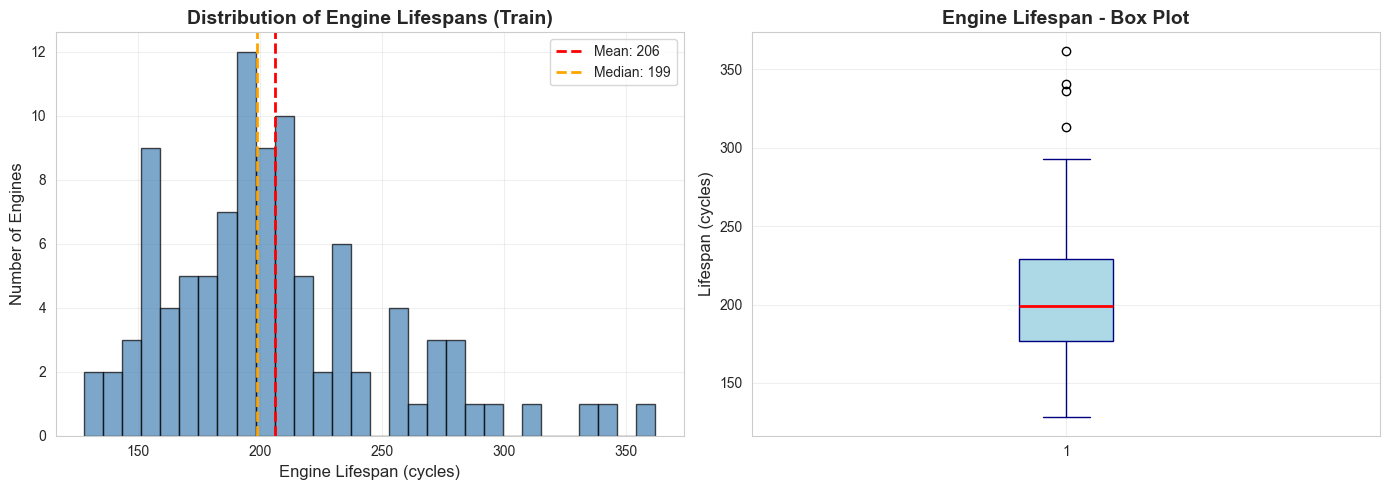

📊 Engine Lifespan Stats:
   Min: 128 cycles
   Max: 362 cycles
   Mean: 206.3 cycles
   Std: 46.3 cycles


In [13]:
# Calculate engine lifespan (max cycle per engine)
engine_life = train_df.groupby('unit_id')['time'].max()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(engine_life, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(engine_life.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {engine_life.mean():.0f}')
axes[0].axvline(engine_life.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {engine_life.median():.0f}')
axes[0].set_xlabel('Engine Lifespan (cycles)', fontsize=12)
axes[0].set_ylabel('Number of Engines', fontsize=12)
axes[0].set_title('Distribution of Engine Lifespans (Train)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(engine_life, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='navy'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='navy'),
                capprops=dict(color='navy'))
axes[1].set_ylabel('Lifespan (cycles)', fontsize=12)
axes[1].set_title('Engine Lifespan - Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Engine Lifespan Stats:")
print(f"   Min: {engine_life.min()} cycles")
print(f"   Max: {engine_life.max()} cycles")
print(f"   Mean: {engine_life.mean():.1f} cycles")
print(f"   Std: {engine_life.std():.1f} cycles")

## 6B. Sensor Degradation Over Time
We track sensor readings across an engine's entire lifespan:
- **Blue line:** Sensor values over time
- **Red dashed line:** 80% of engine life (degradation typically accelerates here)
- **Red shaded area:** Final 20% of life (critical degradation zone)

Key insight: Some sensors show clear trends toward failure, others stay flat.

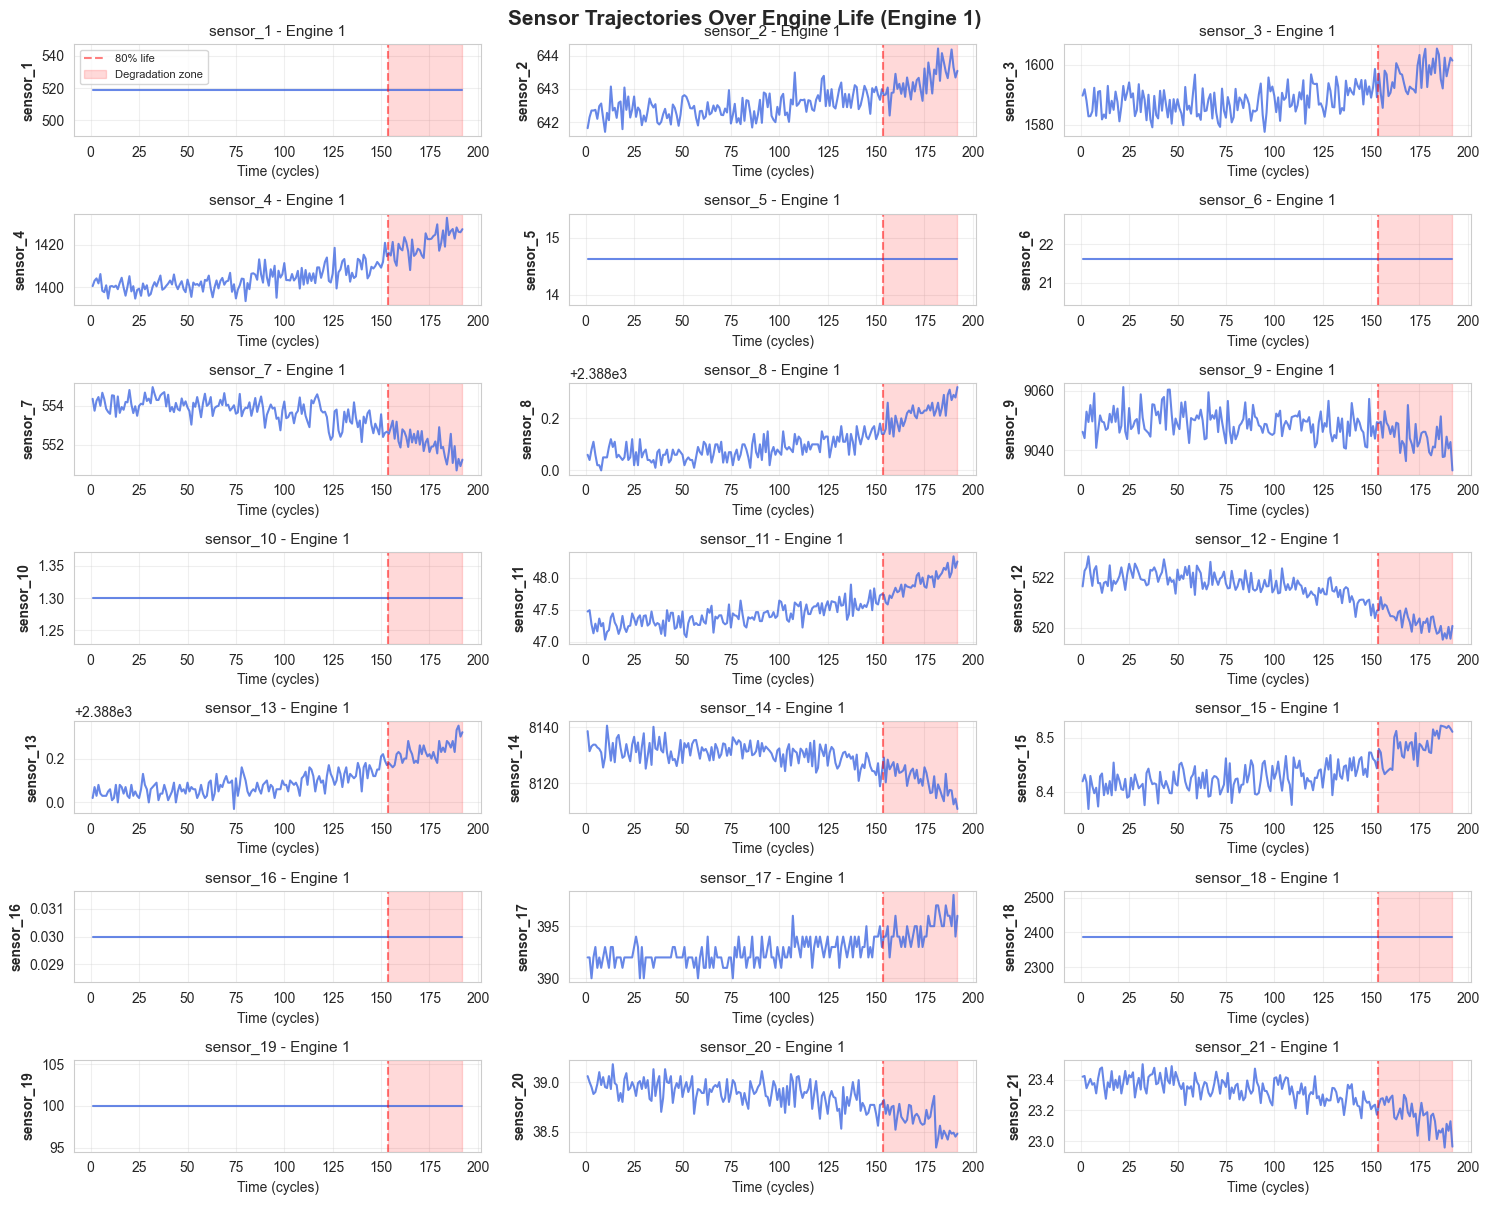

✅ Visualized 21 sensors for Engine 1
   Total cycles: 192


In [15]:
# Pick one engine to analyze in detail
sample_engine_id = 1
sample_engine = train_df[train_df['unit_id'] == sample_engine_id].copy()
sample_engine = sample_engine.sort_values('time').reset_index(drop=True)

# Calculate what portion of life we're at (0 = start, 1 = failure)
sample_engine['life_fraction'] = sample_engine['time'] / sample_engine['time'].max()

# Select sensors to visualize (choose varied sensors)
sensors_to_plot = [ 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

fig, axes = plt.subplots(7, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, sensor in enumerate(sensors_to_plot):
    ax = axes[idx]
    
    # Plot sensor values over time
    ax.plot(sample_engine['time'], sample_engine[sensor], 
            color='royalblue', linewidth=1.5, alpha=0.8)
    
    # Add a vertical line at 80% of life (degradation zone)
    degradation_start = sample_engine['time'].max() * 0.8
    ax.axvline(degradation_start, color='red', linestyle='--', 
               linewidth=1.5, alpha=0.5, label='80% life')
    
    # Shade the degradation zone
    ax.axvspan(degradation_start, sample_engine['time'].max(), 
               alpha=0.15, color='red', label='Degradation zone')
    
    ax.set_xlabel('Time (cycles)', fontsize=10)
    ax.set_ylabel(f'{sensor}', fontsize=10, fontweight='bold')
    ax.set_title(f'{sensor} - Engine {sample_engine_id}', fontsize=11)
    ax.grid(alpha=0.3)
    if idx == 0:
        ax.legend(fontsize=8)

plt.tight_layout()
plt.suptitle(f'Sensor Trajectories Over Engine Life (Engine {sample_engine_id})', 
             fontsize=15, fontweight='bold', y=1.00)
plt.show()

print(f"✅ Visualized {len(sensors_to_plot)} sensors for Engine {sample_engine_id}")
print(f"   Total cycles: {sample_engine['time'].max()}")

### 📊 Sensor Behavior Analysis - Key Observations


#### Constant/Non-Informative Sensors (Flat Lines)
The following sensors show **no variation** across the engine lifecycle and provide **no predictive value**:
- `sensor_1`, `sensor_5`, `sensor_6`, `sensor_10`, `sensor_16`, `sensor_18`, `sensor_19`
- **Action:** These will be dropped during feature engineering to reduce noise and dimensionality.

#### Degradation Signals - Upward Trends (Increase Near Failure)
These sensors show **clear upward trends** as the engine approaches failure:
- **Strong signals:** `sensor_2` (sharp spike), `sensor_3` (steady climb), `sensor_4` (accelerating increase)
- **Moderate signals:** `sensor_8`, `sensor_11`, `sensor_13`, `sensor_15`, `sensor_17`
- **Pattern:** Values increase gradually throughout life, with acceleration in the final 20% (red zone)

#### Degradation Signals - Downward Trends (Decrease Near Failure)
These sensors show **declining values** as degradation progresses:
- **Strong signals:** `sensor_7` (sharp drop), `sensor_12`, `sensor_14` (decline in red zone)
- **Moderate signals:** `sensor_20`, `sensor_21` (gradual decrease)
- **Pattern:** Values drop in the degradation zone, indicating loss of efficiency/performance

#### Key Insight
**Predictive Power:** Sensors with strong directional trends (either up or down) in the final 20-30% of life are our most valuable features for RUL prediction. The combination of upward and downward trending sensors will help the model detect multi-dimensional degradation patterns.

**Next Steps:**
1. Drop constant sensors
2. Engineer time-windowed features (rolling mean, std, trend) from high-signal sensors
3. Create RUL target variable for regression modeling

### `Nope`

## 7. Load All Training Datasets for Comparison
We load all 4 sub-datasets to understand their structure and differences:
- **FD001:** 1 operating condition, 1 fault mode (HPC degradation)
- **FD002:** 6 operating conditions, 1 fault mode (HPC degradation)
- **FD003:** 1 operating condition, 2 fault modes (HPC + Fan degradation)
- **FD004:** 6 operating conditions, 2 fault modes (HPC + Fan degradation)

Notice how `op_setting` columns vary more in FD002/FD004 (6 conditions) vs FD001/FD003 (1 condition).

In [6]:
# Load all 4 training datasets
train_dfs = {}
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    file_path = os.path.join(PROCESSED_DIR, f'train_{dataset}.csv')
    train_dfs[dataset] = pd.read_csv(file_path)
    print(f"✅ Loaded train_{dataset}.csv: {train_dfs[dataset].shape}")

print("\n" + "="*80)

# Preview each dataset
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"\n📊 TRAIN_{dataset} - First 20 rows:")
    print(f"   Shape: {train_dfs[dataset].shape}")
    print(f"   Engines: {train_dfs[dataset]['unit_id'].nunique()}")
    print(f"   Cycles range: {train_dfs[dataset]['time'].min()} to {train_dfs[dataset]['time'].max()}")
    print("-"*80)
    print(train_dfs[dataset].head(20))
    print("\n")

✅ Loaded train_FD001.csv: (20631, 26)
✅ Loaded train_FD002.csv: (53759, 26)
✅ Loaded train_FD003.csv: (24720, 26)
✅ Loaded train_FD004.csv: (61249, 26)


📊 TRAIN_FD001 - First 20 rows:
   Shape: (20631, 26)
   Engines: 100
   Cycles range: 1 to 362
--------------------------------------------------------------------------------
    unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0         1     1       -0.0007       -0.0004         100.0    518.67   
1         1     2        0.0019       -0.0003         100.0    518.67   
2         1     3       -0.0043        0.0003         100.0    518.67   
3         1     4        0.0007        0.0000         100.0    518.67   
4         1     5       -0.0019       -0.0002         100.0    518.67   
5         1     6       -0.0043       -0.0001         100.0    518.67   
6         1     7        0.0010        0.0001         100.0    518.67   
7         1     8       -0.0034        0.0003         100.0    518.67   
8         1  

## 7B. Individual Dataset Sensor Analysis

### FD001  Sensor Trajectories
Single operating condition, single fault mode (HPC degradation).
Look for flat/constant sensors vs sensors with clear trends.

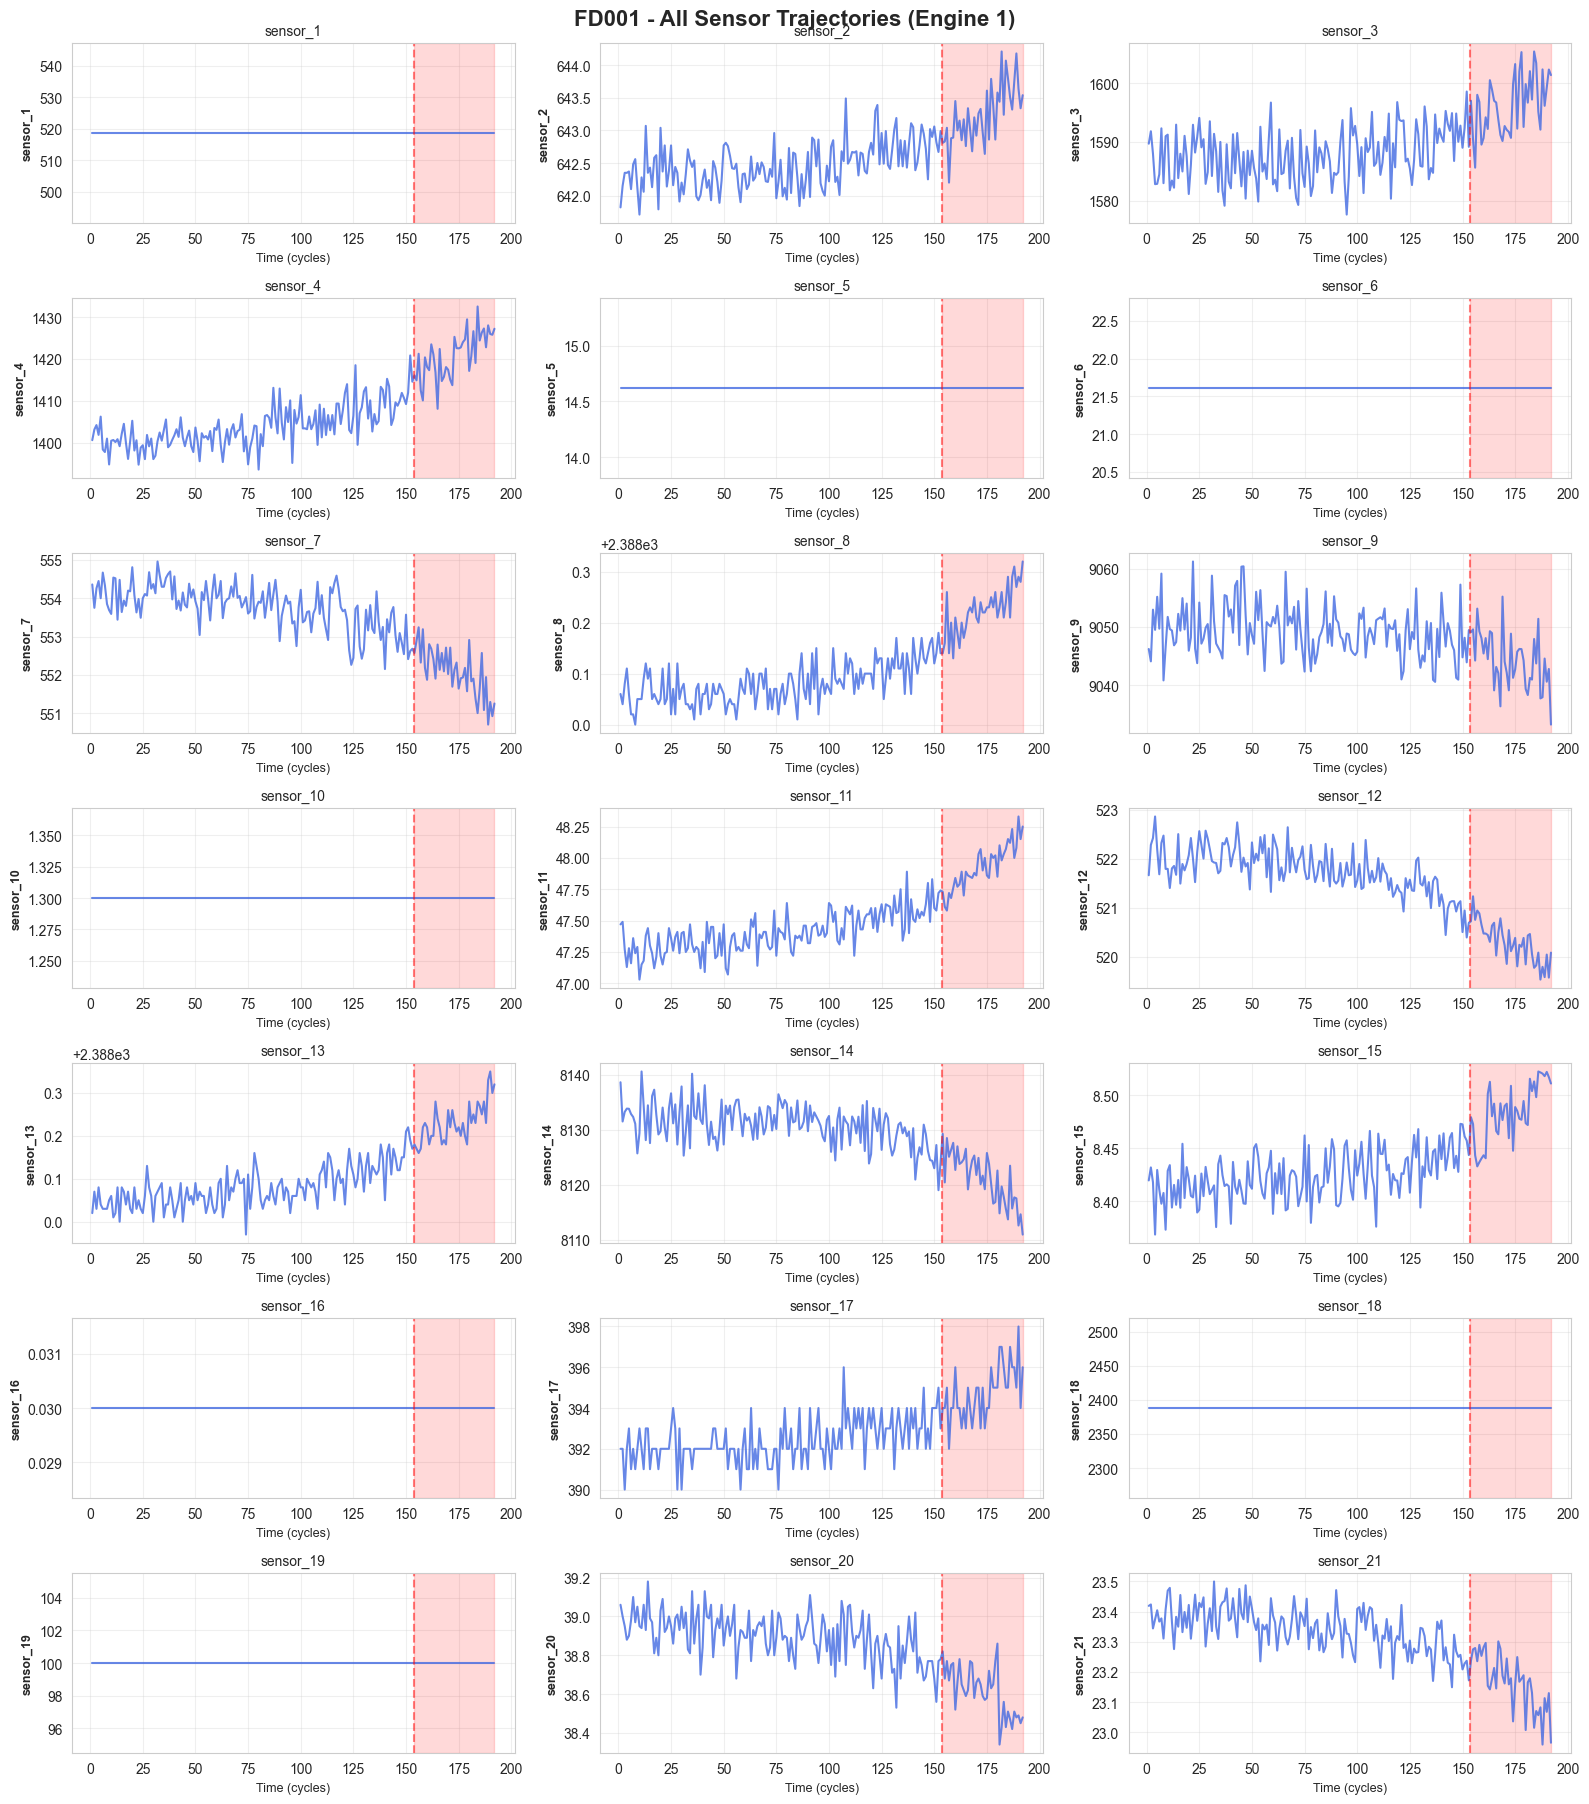

✅ FD001: Visualized 21 sensors


In [7]:
# FD001 - Already done above, but let's do it again for consistency
dataset_name = 'FD001'
sample_engine_id = 1

sample_engine = train_dfs[dataset_name][train_dfs[dataset_name]['unit_id'] == sample_engine_id].copy()
sample_engine = sample_engine.sort_values('time').reset_index(drop=True)

# Get all sensor columns
sensor_cols = [col for col in sample_engine.columns if col.startswith('sensor_')]

fig, axes = plt.subplots(7, 3, figsize=(16, 18))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols):
    ax = axes[idx]
    
    ax.plot(sample_engine['time'], sample_engine[sensor], 
            color='royalblue', linewidth=1.5, alpha=0.8)
    
    degradation_start = sample_engine['time'].max() * 0.8
    ax.axvline(degradation_start, color='red', linestyle='--', 
               linewidth=1.5, alpha=0.5)
    ax.axvspan(degradation_start, sample_engine['time'].max(), 
               alpha=0.15, color='red')
    
    ax.set_xlabel('Time (cycles)', fontsize=9)
    ax.set_ylabel(f'{sensor}', fontsize=9, fontweight='bold')
    ax.set_title(f'{sensor}', fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(len(sensor_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(f'{dataset_name} - All Sensor Trajectories (Engine {sample_engine_id})', 
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print(f"✅ {dataset_name}: Visualized {len(sensor_cols)} sensors")

### FD002 - Sensor Trajectories
**6 operating conditions**, single fault mode (HPC degradation).
Sensors may show more variability due to different flight conditions.
Expected: Similar degradation patterns to FD001 but with operational noise.

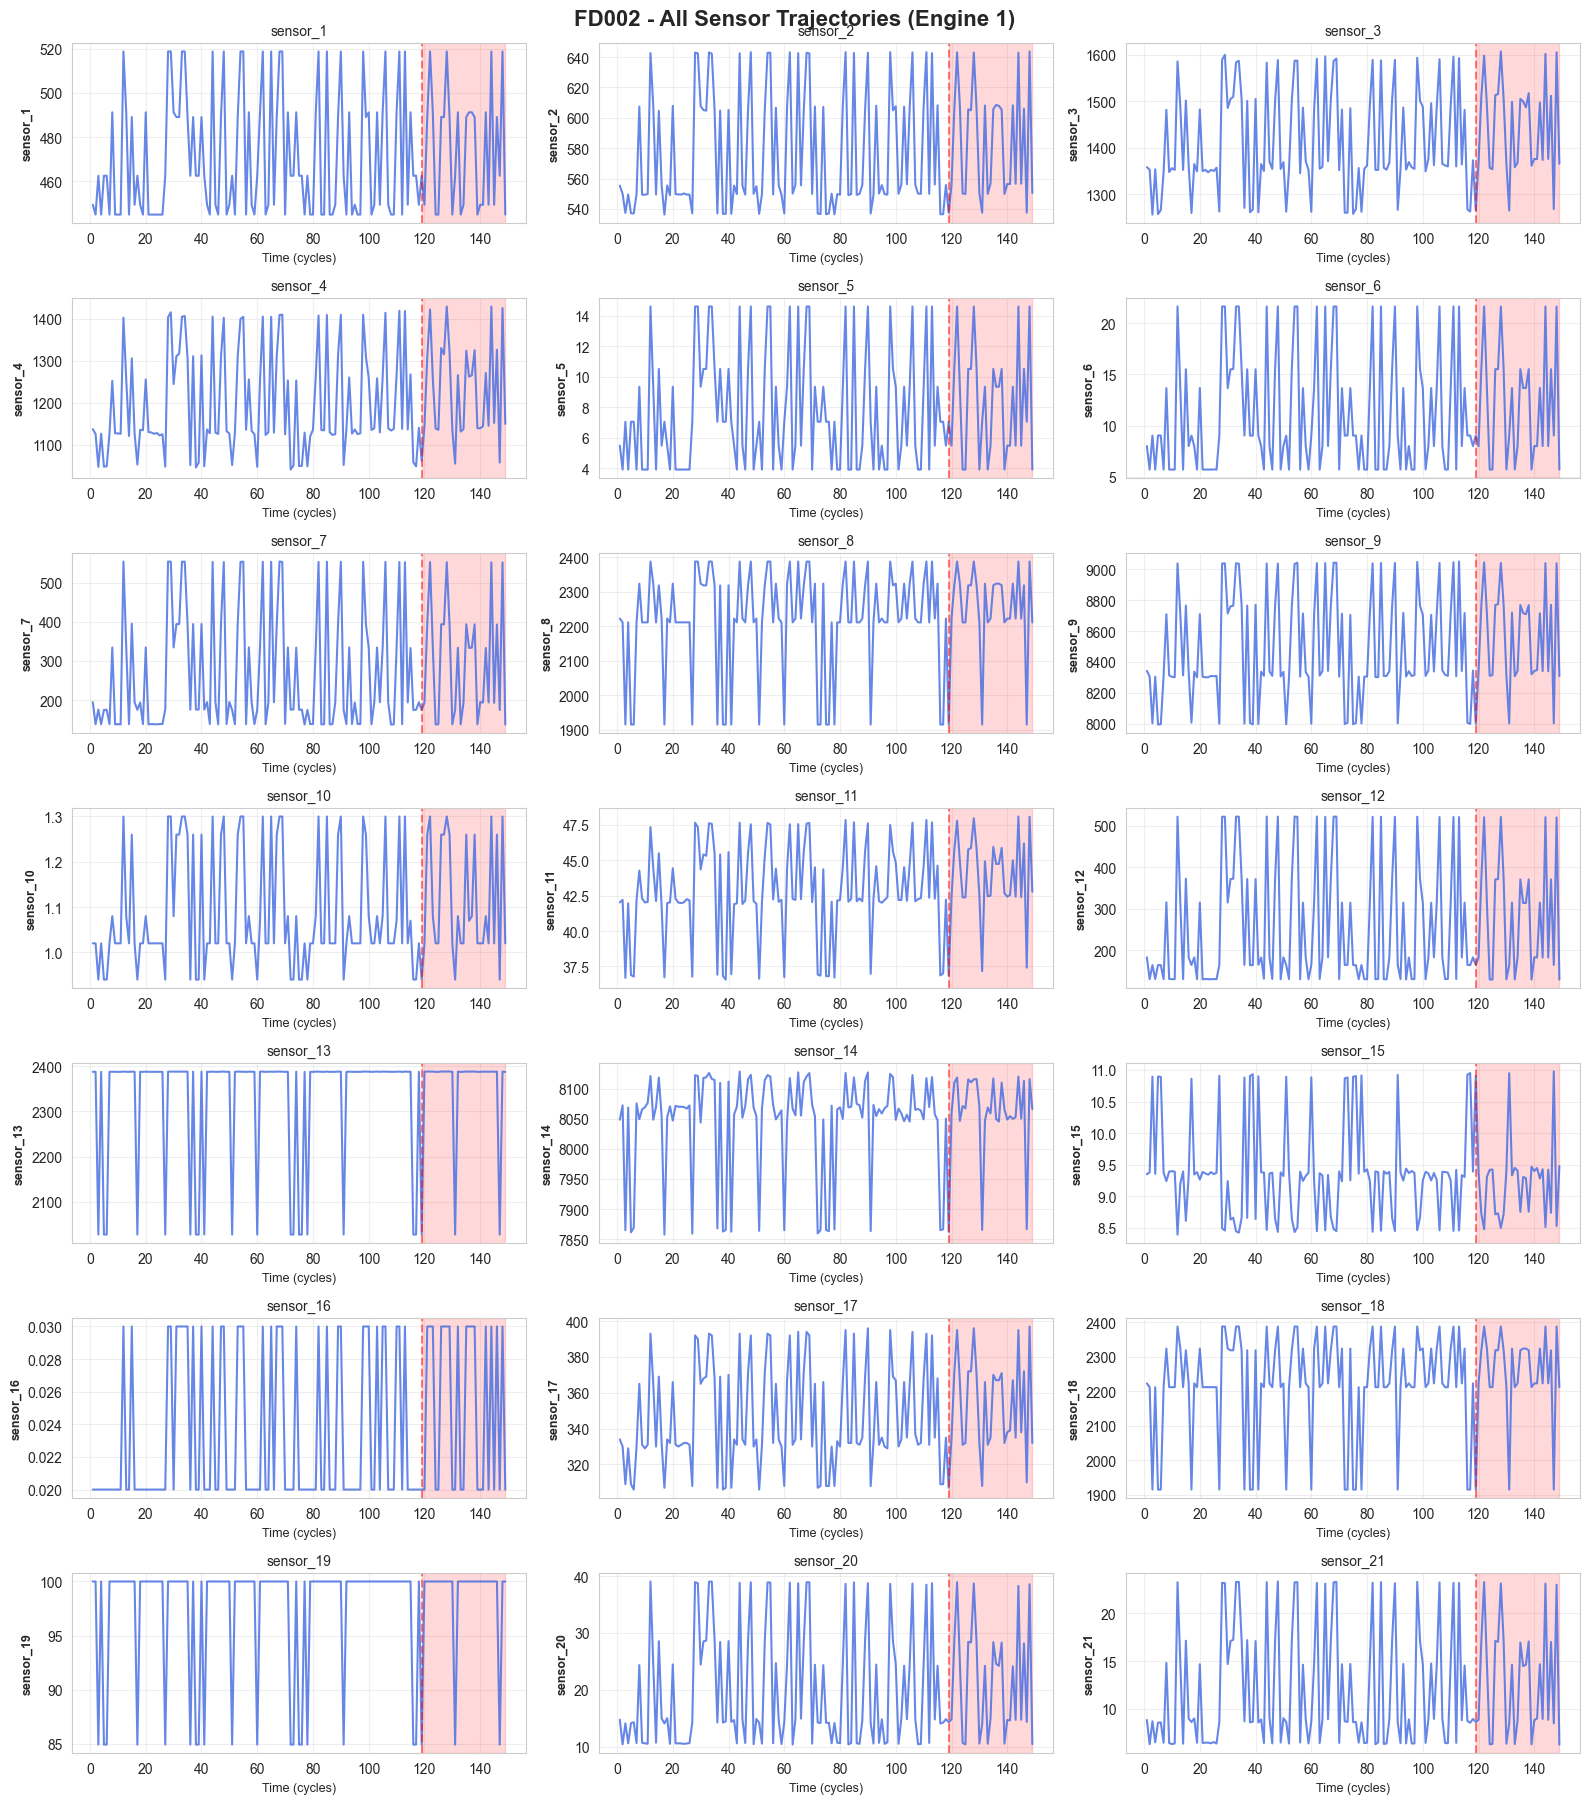

✅ FD002: Visualized 21 sensors


In [8]:
# FD002
dataset_name = 'FD002'
sample_engine_id = 1

sample_engine = train_dfs[dataset_name][train_dfs[dataset_name]['unit_id'] == sample_engine_id].copy()
sample_engine = sample_engine.sort_values('time').reset_index(drop=True)

# Get all sensor columns
sensor_cols = [col for col in sample_engine.columns if col.startswith('sensor_')]

fig, axes = plt.subplots(7, 3, figsize=(16, 18))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols):
    ax = axes[idx]
    
    ax.plot(sample_engine['time'], sample_engine[sensor], 
            color='royalblue', linewidth=1.5, alpha=0.8)
    
    degradation_start = sample_engine['time'].max() * 0.8
    ax.axvline(degradation_start, color='red', linestyle='--', 
               linewidth=1.5, alpha=0.5)
    ax.axvspan(degradation_start, sample_engine['time'].max(), 
               alpha=0.15, color='red')
    
    ax.set_xlabel('Time (cycles)', fontsize=9)
    ax.set_ylabel(f'{sensor}', fontsize=9, fontweight='bold')
    ax.set_title(f'{sensor}', fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(len(sensor_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(f'{dataset_name} - All Sensor Trajectories (Engine {sample_engine_id})', 
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print(f"✅ {dataset_name}: Visualized {len(sensor_cols)} sensors")

### FD003 - Sensor Trajectories
Single operating condition, **2 fault modes** (HPC + Fan degradation).
Expected: Additional sensors may show degradation compared to FD001 due to fan faults.
Some sensors might show different trend patterns.

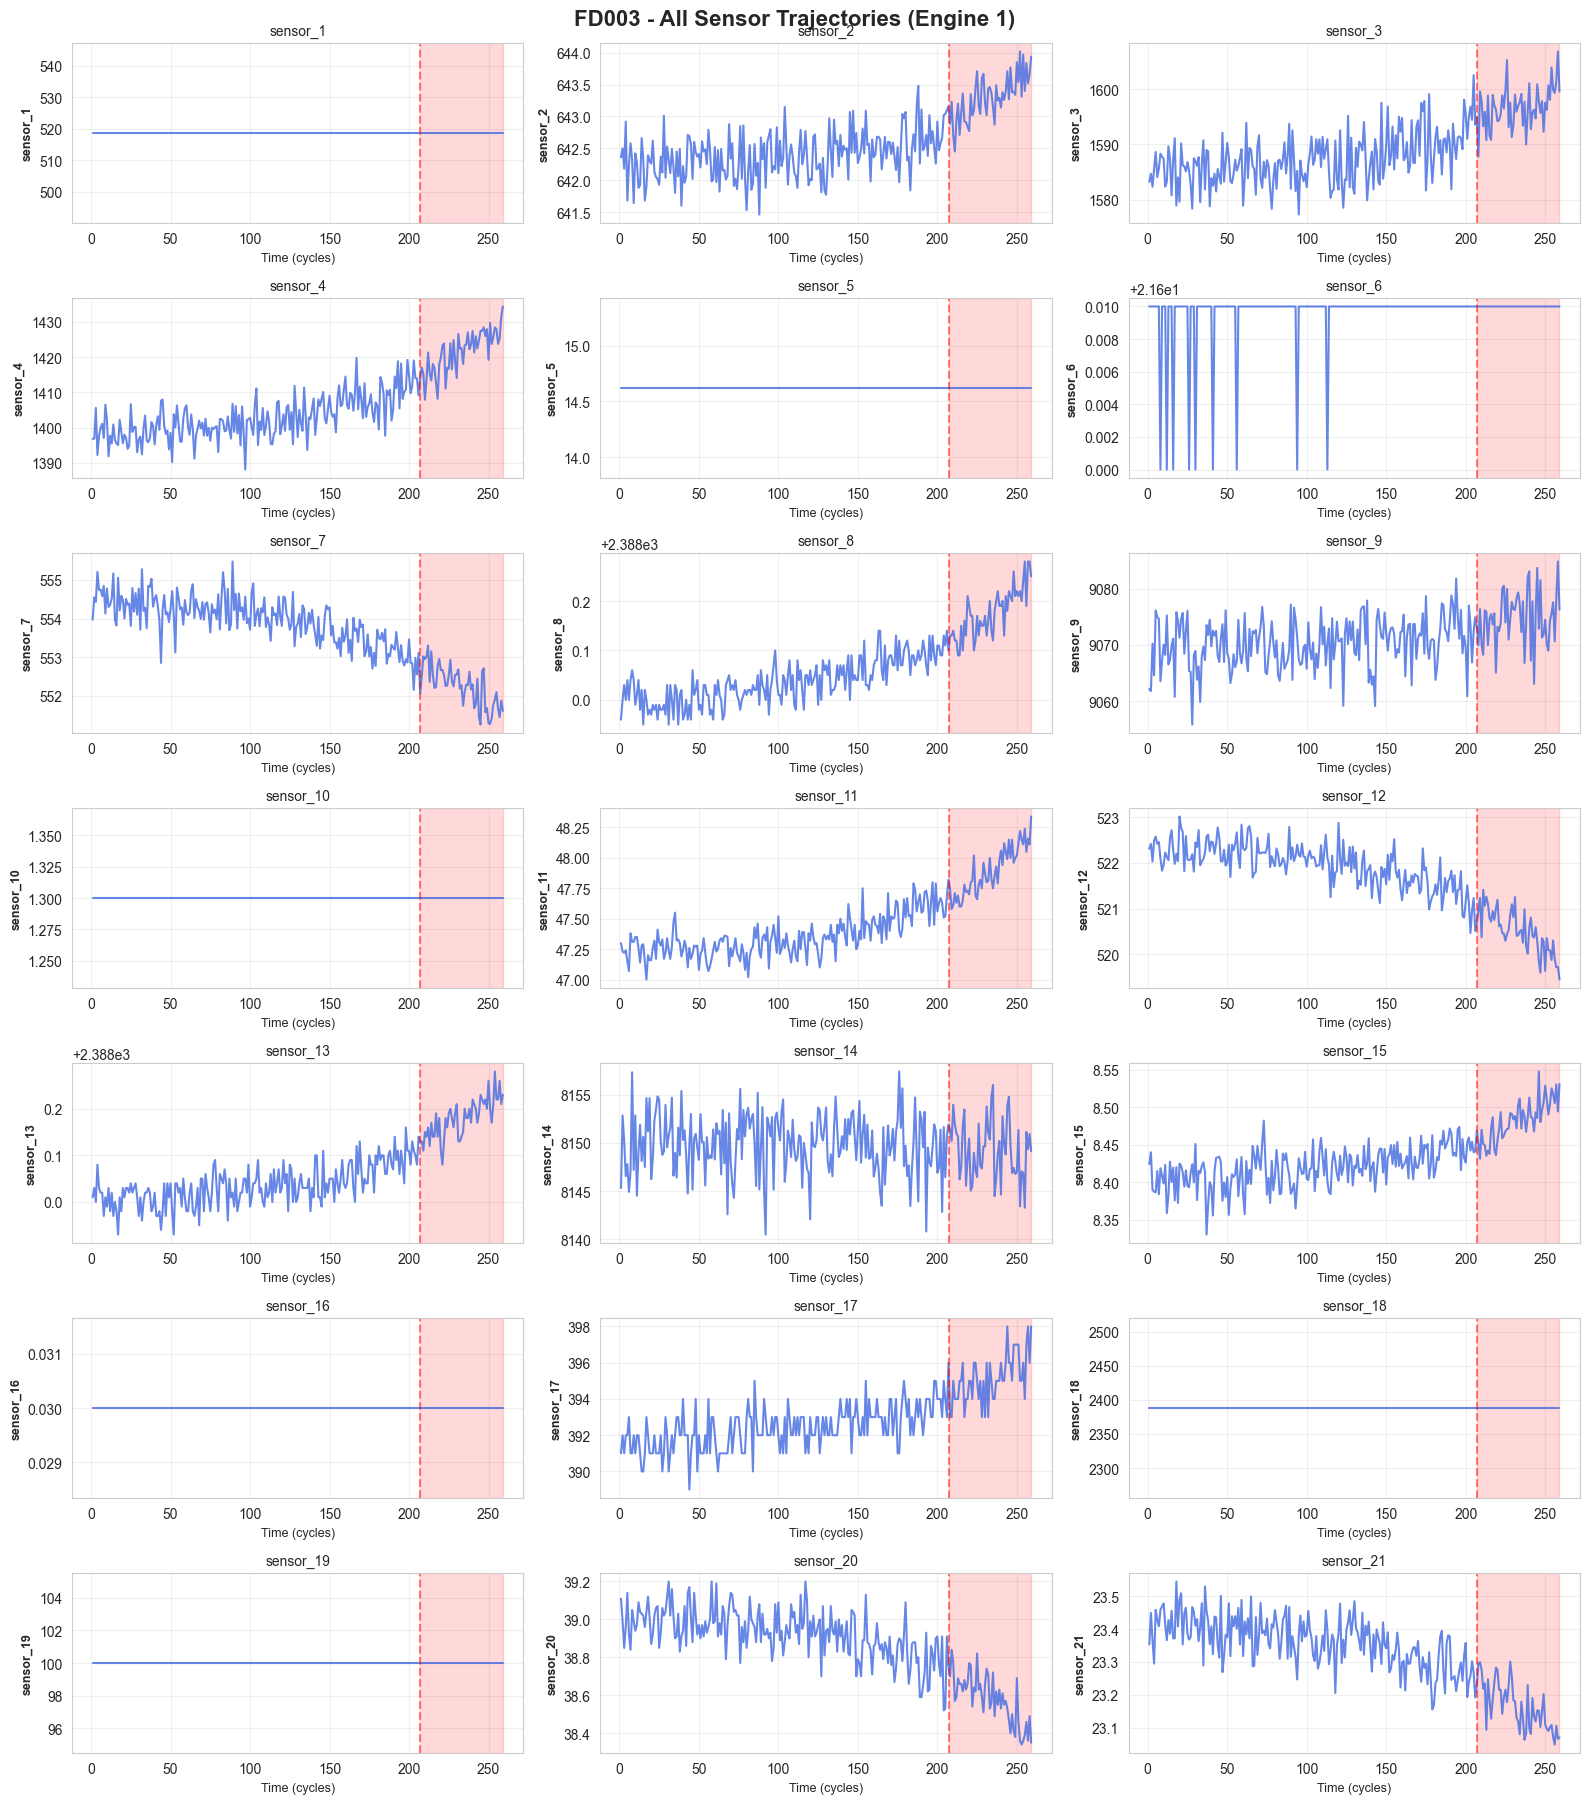

✅ FD003: Visualized 21 sensors


In [9]:
# FD003
dataset_name = 'FD003'
sample_engine_id = 1

sample_engine = train_dfs[dataset_name][train_dfs[dataset_name]['unit_id'] == sample_engine_id].copy()
sample_engine = sample_engine.sort_values('time').reset_index(drop=True)

# Get all sensor columns
sensor_cols = [col for col in sample_engine.columns if col.startswith('sensor_')]

fig, axes = plt.subplots(7, 3, figsize=(16, 18))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols):
    ax = axes[idx]
    
    ax.plot(sample_engine['time'], sample_engine[sensor], 
            color='royalblue', linewidth=1.5, alpha=0.8)
    
    degradation_start = sample_engine['time'].max() * 0.8
    ax.axvline(degradation_start, color='red', linestyle='--', 
               linewidth=1.5, alpha=0.5)
    ax.axvspan(degradation_start, sample_engine['time'].max(), 
               alpha=0.15, color='red')
    
    ax.set_xlabel('Time (cycles)', fontsize=9)
    ax.set_ylabel(f'{sensor}', fontsize=9, fontweight='bold')
    ax.set_title(f'{sensor}', fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(len(sensor_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(f'{dataset_name} - All Sensor Trajectories (Engine {sample_engine_id})', 
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print(f"✅ {dataset_name}: Visualized {len(sensor_cols)} sensors")

### FD004 - Sensor Trajectories
**6 operating conditions, 2 fault modes** (HPC + Fan degradation).
Most complex dataset - combination of operational variability + multiple failure modes.
Expected: Highest sensor variability, multiple degradation signatures.

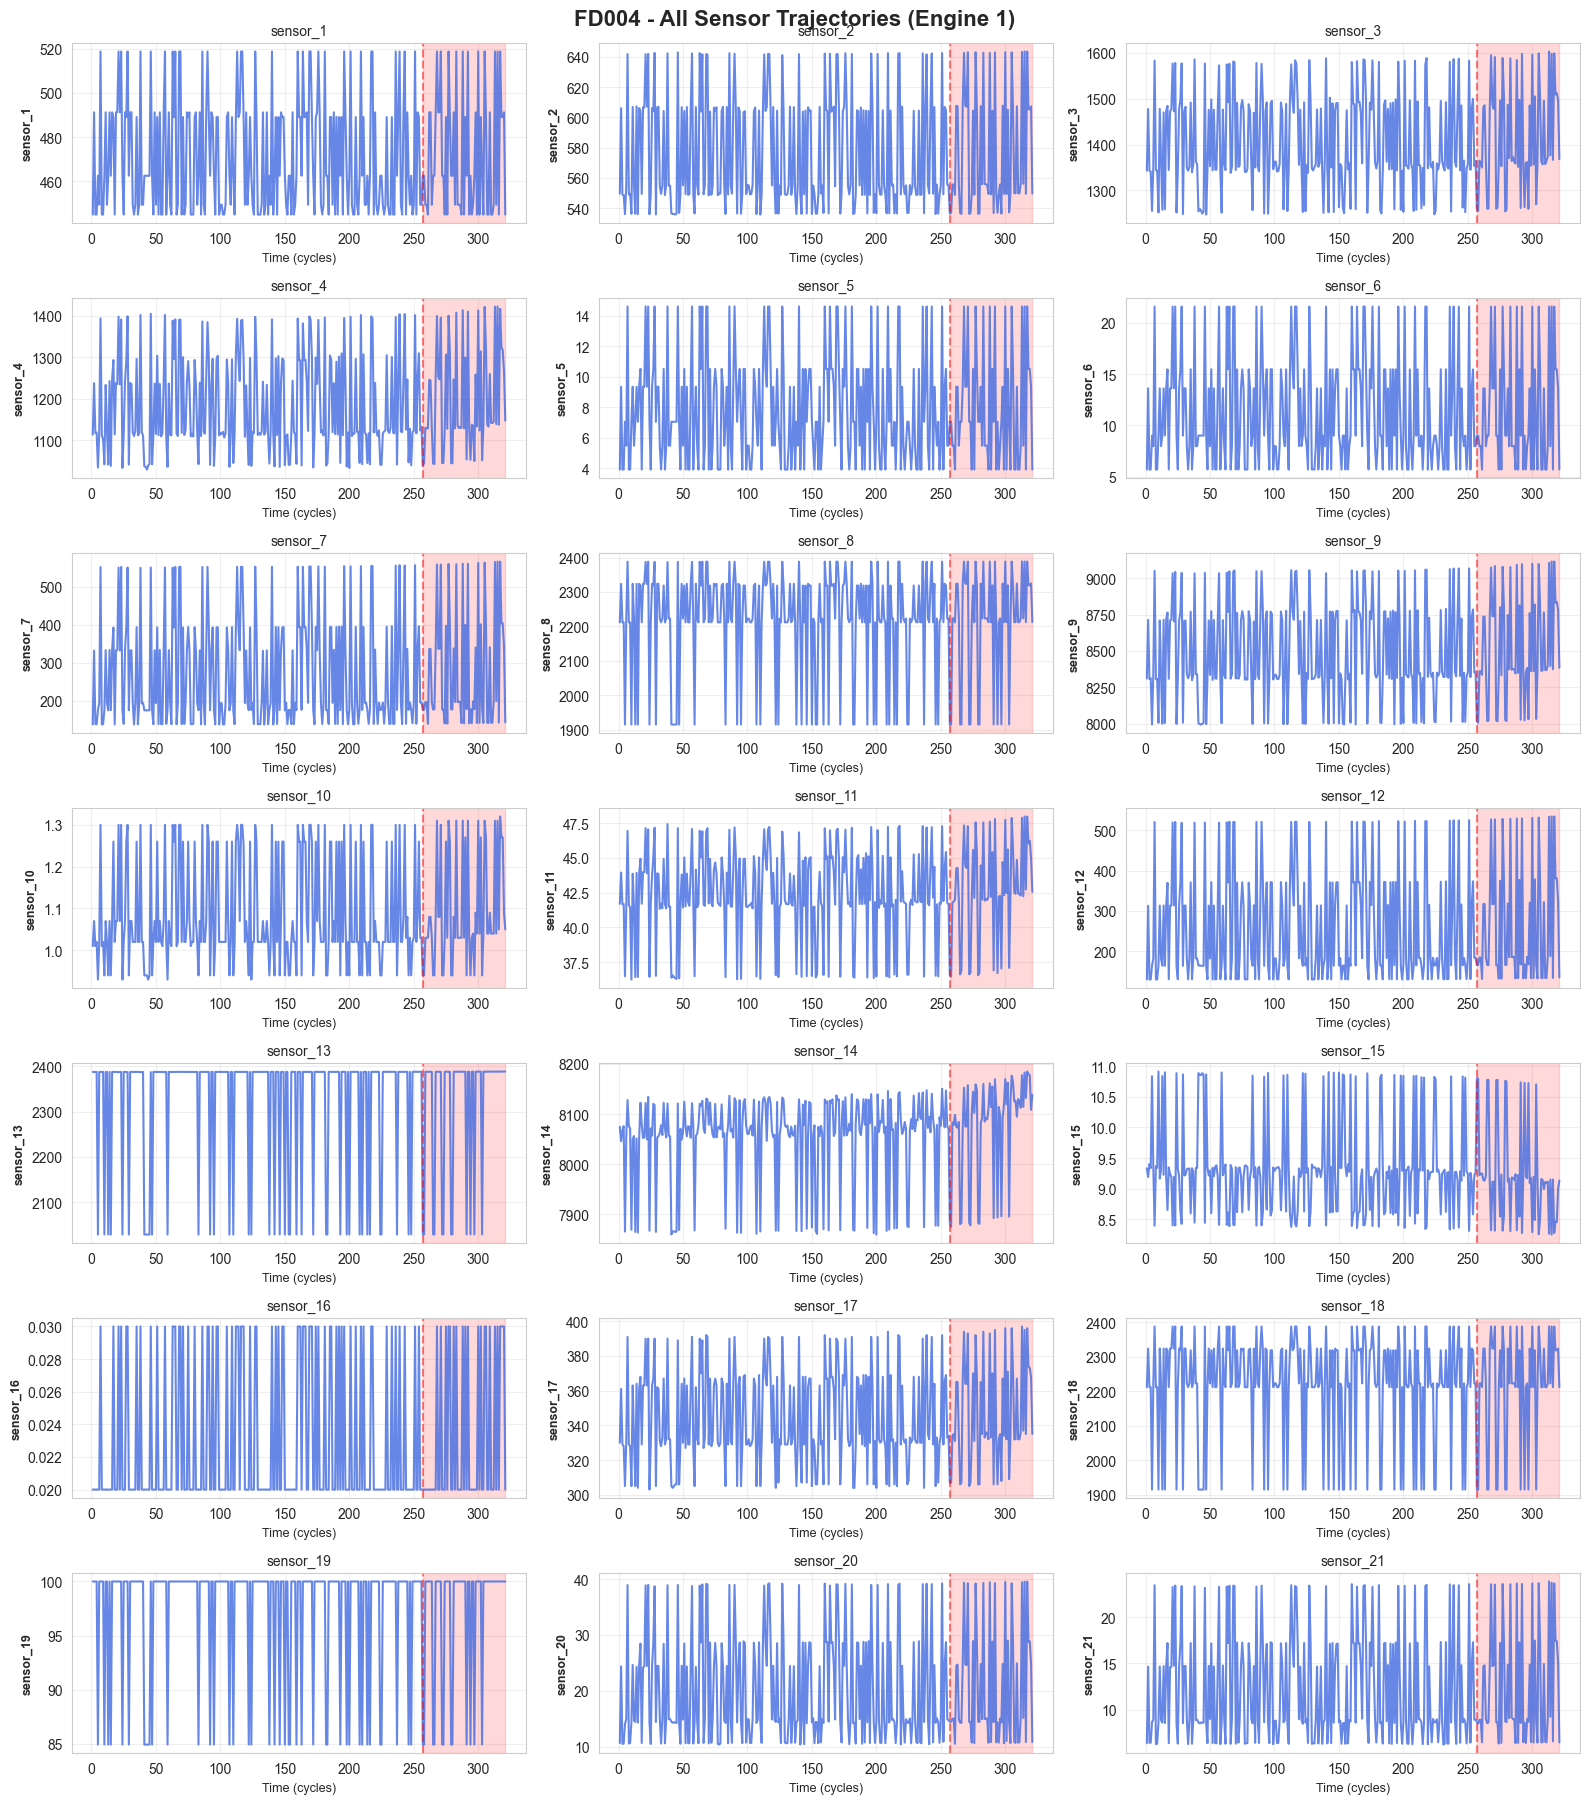

✅ FD004: Visualized 21 sensors


In [10]:
# FD004
dataset_name = 'FD004'
sample_engine_id = 1

sample_engine = train_dfs[dataset_name][train_dfs[dataset_name]['unit_id'] == sample_engine_id].copy()
sample_engine = sample_engine.sort_values('time').reset_index(drop=True)

# Get all sensor columns
sensor_cols = [col for col in sample_engine.columns if col.startswith('sensor_')]

fig, axes = plt.subplots(7, 3, figsize=(16, 18))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols):
    ax = axes[idx]
    
    ax.plot(sample_engine['time'], sample_engine[sensor], 
            color='royalblue', linewidth=1.5, alpha=0.8)
    
    degradation_start = sample_engine['time'].max() * 0.8
    ax.axvline(degradation_start, color='red', linestyle='--', 
               linewidth=1.5, alpha=0.5)
    ax.axvspan(degradation_start, sample_engine['time'].max(), 
               alpha=0.15, color='red')
    
    ax.set_xlabel('Time (cycles)', fontsize=9)
    ax.set_ylabel(f'{sensor}', fontsize=9, fontweight='bold')
    ax.set_title(f'{sensor}', fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(len(sensor_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(f'{dataset_name} - All Sensor Trajectories (Engine {sample_engine_id})', 
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print(f"✅ {dataset_name}: Visualized {len(sensor_cols)} sensors")

## 8. Intelligent Low-Variance Sensor Detection

Instead of manually eyeballing or hardcoding thresholds, we use **statistical metrics**:

### Method:
1. **Coefficient of Variation (CV)** = std / mean
   - Normalized measure of variability (handles different sensor scales)
   - CV < 0.01 means less than 1% variation
   
2. **IQR Ratio** = (Q3 - Q1) / median
   - Measures spread relative to center
   - Robust to outliers
   
3. **Decision Rule:**
   - Drop sensor if **BOTH** CV < 0.01 AND IQR_ratio < 0.01
   - Adapts automatically to each dataset's noise characteristics

This approach:
- ✅ No hardcoded sensor names
- ✅ Adapts to FD001/FD003 (low noise) vs FD002/FD004 (high operational noise)
- ✅ Reproducible and explainable

## 8`. Final Low-Variance Sensor List

### Manual Overrides:
After visual inspection, we manually add:
- **FD001:** `sensor_6` (perfectly linear, no degradation signal)
- **FD003:** `sensor_6`, `sensor_10` (both linear with no variation)
- **FD002/FD004:** No additional drops (noisy sensors will be handled in feature selection phase)

### Final Drop List:
- **FD001:** 7 sensors (1, 5, 6, 10, 16, 18, 19)
- **FD002:** 1 sensor (14)
- **FD003:** 7 sensors (1, 5, 6, 10, 16, 18, 19)
- **FD004:** 1 sensor (14)

**Note:** FD002/FD004 have high operational noise. We'll use feature importance/correlation analysis in the next phase to drop truly useless noisy sensors.

In [11]:
def identify_low_variance_sensors_final(df, dataset_name):
    """
    Final version with manual overrides for visually-confirmed constant sensors.
    """
    # Dataset-specific thresholds
    thresholds = {
        'FD001': {'cv': 0.00002, 'iqr': 0.00005},
        'FD002': {'cv': 0.015, 'iqr': 0.010},
        'FD003': {'cv': 0.00005, 'iqr': 0.00005},
        'FD004': {'cv': 0.015, 'iqr': 0.010},
    }
    
    # Manual additions (visually confirmed as constant/linear)
    manual_drops = {
        'FD001': ['sensor_6'],           # totally linear, no info
        'FD002': [],                     # will handle noisy sensors in next phase
        'FD003': ['sensor_6', 'sensor_10'],  # both totally linear
        'FD004': [],                     # will handle noisy sensors in next phase
    }
    
    cv_threshold = thresholds[dataset_name]['cv']
    iqr_threshold = thresholds[dataset_name]['iqr']
    
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    
    low_variance_sensors = []
    stats_list = []
    
    for sensor in sensor_cols:
        values = df[sensor]
        
        # Calculate statistics
        mean_val = values.mean()
        std_val = values.std()
        median_val = values.median()
        q1 = values.quantile(0.25)
        q3 = values.quantile(0.75)
        iqr = q3 - q1
        
        # Coefficient of Variation
        cv = std_val / abs(mean_val) if mean_val != 0 else 0
        
        # IQR ratio
        iqr_ratio = iqr / abs(median_val) if median_val != 0 else 0
        
        # Decision: low variance if BOTH conditions met
        is_low_variance = (cv < cv_threshold) and (iqr_ratio < iqr_threshold)
        
        stats_list.append({
            'sensor': sensor,
            'mean': mean_val,
            'std': std_val,
            'cv': cv,
            'iqr': iqr,
            'iqr_ratio': iqr_ratio,
            'is_low_variance': is_low_variance
        })
        
        if is_low_variance:
            low_variance_sensors.append(sensor)
    
    # Add manual drops
    for sensor in manual_drops[dataset_name]:
        if sensor not in low_variance_sensors:
            low_variance_sensors.append(sensor)
    
    # Sort for readability
    low_variance_sensors = sorted(low_variance_sensors)
    
    # Create stats dataframe
    stats_df = pd.DataFrame(stats_list)
    stats_df = stats_df.sort_values('cv')
    
    print(f"\n{'='*80}")
    print(f"  {dataset_name} - FINAL Low Variance Sensor Detection")
    print(f"{'='*80}")
    print(f"  CV Threshold: {cv_threshold}")
    print(f"  IQR Ratio Threshold: {iqr_threshold}")
    print(f"  Manual additions: {manual_drops[dataset_name]}")
    print(f"\n  📊 Top 10 Lowest Variance Sensors:")
    print(stats_df.head(10)[['sensor', 'cv', 'iqr_ratio', 'is_low_variance']].to_string(index=False))
    print(f"\n  ❌ FINAL Sensors to DROP ({len(low_variance_sensors)}):")
    print(f"     {low_variance_sensors}")
    print(f"{'='*80}\n")
    
    return low_variance_sensors, stats_df


# Run final version
final_drops = {}
final_stats = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    drops, stats = identify_low_variance_sensors_final(train_dfs[dataset], dataset)
    final_drops[dataset] = drops
    final_stats[dataset] = stats

# Summary
print("\n" + "="*80)
print("  SUMMARY: Sensors to Drop per Dataset")
print("="*80)
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"  {dataset}: {len(final_drops[dataset])} sensors → {final_drops[dataset]}")
print("="*80)


  FD001 - FINAL Low Variance Sensor Detection
  CV Threshold: 2e-05
  IQR Ratio Threshold: 5e-05
  Manual additions: ['sensor_6']

  📊 Top 10 Lowest Variance Sensors:
   sensor           cv  iqr_ratio  is_low_variance
 sensor_1 0.000000e+00   0.000000             True
sensor_19 0.000000e+00   0.000000             True
sensor_10 0.000000e+00   0.000000             True
sensor_18 0.000000e+00   0.000000             True
 sensor_5 1.215048e-16   0.000000             True
sensor_16 4.626041e-16   0.000000             True
 sensor_8 2.972471e-05   0.000038            False
sensor_13 3.011559e-05   0.000042            False
 sensor_6 6.427569e-05   0.000000            False
 sensor_2 7.780739e-04   0.001050            False

  ❌ FINAL Sensors to DROP (7):
     ['sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5', 'sensor_6']


  FD002 - FINAL Low Variance Sensor Detection
  CV Threshold: 0.015
  IQR Ratio Threshold: 0.01
  Manual additions: []

  📊 Top 10 Lowest Varia

## 8C. Final Low-Variance Sensor List

### Manual Overrides:
After visual inspection, we manually add:
- **FD001:** `sensor_6` (perfectly linear, no degradation signal)
- **FD003:** `sensor_6`, `sensor_10` (both linear with no variation)
- **FD002/FD004:** No additional drops (noisy sensors will be handled in feature selection phase)

### Final Drop List:
- **FD001:** 7 sensors (1, 5, 6, 10, 16, 18, 19)
- **FD002:** 1 sensor (14)
- **FD003:** 7 sensors (1, 5, 6, 10, 16, 18, 19)
- **FD004:** 1 sensor (14)

**Note:** FD002/FD004 have high operational noise. We'll use feature importance/correlation analysis in the next phase to drop truly useless noisy sensors.

In [12]:
# Create output directory
NON_CONST_DIR = "data/non-const-csv"
os.makedirs(NON_CONST_DIR, exist_ok=True)
print(f"✅ Created directory: {NON_CONST_DIR}\n")

# Process all train and test files
datasets_to_clean = ['FD001', 'FD002', 'FD003', 'FD004']
file_types = ['train', 'test']  # Don't process RUL files (they only have 1 column)

cleaned_count = 0

for dataset in datasets_to_clean:
    sensors_to_drop = final_drops[dataset]
    
    print(f"{'='*80}")
    print(f"  Processing {dataset} - Dropping {len(sensors_to_drop)} sensors")
    print(f"{'='*80}")
    
    for file_type in file_types:
        # Load CSV
        input_file = f"{file_type}_{dataset}.csv"
        input_path = os.path.join(PROCESSED_DIR, input_file)
        
        df = pd.read_csv(input_path)
        original_cols = df.shape[1]
        
        # Drop low-variance sensors
        df_cleaned = df.drop(columns=sensors_to_drop, errors='ignore')
        
        # Save to non-const-csv directory
        output_file = f"{file_type}_{dataset}.csv"
        output_path = os.path.join(NON_CONST_DIR, output_file)
        df_cleaned.to_csv(output_path, index=False)
        
        print(f"  ✅ {file_type}_{dataset}.csv: {original_cols} cols → {df_cleaned.shape[1]} cols "
              f"(dropped {original_cols - df_cleaned.shape[1]})")
        
        cleaned_count += 1
    
    # Copy RUL file as-is (no sensor columns to drop)
    rul_input = os.path.join(PROCESSED_DIR, f"RUL_{dataset}.csv")
    rul_output = os.path.join(NON_CONST_DIR, f"RUL_{dataset}.csv")
    
    rul_df = pd.read_csv(rul_input)
    rul_df.to_csv(rul_output, index=False)
    print(f"  ✅ RUL_{dataset}.csv: copied as-is (no changes needed)")
    print()

print(f"\n{'='*80}")
print(f"  ✅ COMPLETE: Processed {cleaned_count} files")
print(f"  📂 Cleaned CSVs saved to: {NON_CONST_DIR}")
print(f"{'='*80}\n")

# Verify output
output_files = sorted([f for f in os.listdir(NON_CONST_DIR) if f.endswith('.csv')])
print(f"📊 Files in {NON_CONST_DIR}:")
for f in output_files:
    print(f"   - {f}")

✅ Created directory: data/non-const-csv

  Processing FD001 - Dropping 7 sensors
  ✅ train_FD001.csv: 26 cols → 19 cols (dropped 7)
  ✅ test_FD001.csv: 26 cols → 19 cols (dropped 7)
  ✅ RUL_FD001.csv: copied as-is (no changes needed)

  Processing FD002 - Dropping 1 sensors
  ✅ train_FD002.csv: 26 cols → 25 cols (dropped 1)
  ✅ test_FD002.csv: 26 cols → 25 cols (dropped 1)
  ✅ RUL_FD002.csv: copied as-is (no changes needed)

  Processing FD003 - Dropping 7 sensors
  ✅ train_FD003.csv: 26 cols → 19 cols (dropped 7)
  ✅ test_FD003.csv: 26 cols → 19 cols (dropped 7)
  ✅ RUL_FD003.csv: copied as-is (no changes needed)

  Processing FD004 - Dropping 1 sensors
  ✅ train_FD004.csv: 26 cols → 25 cols (dropped 1)
  ✅ test_FD004.csv: 26 cols → 25 cols (dropped 1)
  ✅ RUL_FD004.csv: copied as-is (no changes needed)


  ✅ COMPLETE: Processed 8 files
  📂 Cleaned CSVs saved to: data/non-const-csv

📊 Files in data/non-const-csv:
   - RUL_FD001.csv
   - RUL_FD002.csv
   - RUL_FD003.csv
   - RUL_FD004.

## 9. Remove Noisy Sensors (Correlation-Based Selection)

### Method: Correlation with Engine Age
For each sensor, we calculate correlation with **normalized engine age** (time/max_time):
- **High |correlation|** → Sensor changes systematically as engine degrades (KEEP)
- **Low |correlation|** → Sensor is random noise, no relationship to failure (DROP)

### Thresholds:
- **FD001/FD003** (1 condition): `|r| < 0.3` → drop  
  *Rationale:* Clear degradation expected, low bar
  
- **FD002/FD004** (6 conditions): `|r| < 0.15` → drop  
  *Rationale:* Operational noise masks trends, need lower threshold

### What We Measure:
- **Positive correlation:** Sensor increases toward failure (e.g., temperature ↑)
- **Negative correlation:** Sensor decreases toward failure (e.g., efficiency ↓)
- **Near-zero correlation:** Just noise, no predictive value

In [13]:
def calculate_sensor_age_correlation(df, dataset_name):
    """
    Calculate correlation between each sensor and normalized engine age.
    Sensors with low correlation are just noise.
    """
    # Add normalized age column (0 = start, 1 = failure)
    df_with_age = df.copy()
    max_time_per_engine = df.groupby('unit_id')['time'].transform('max')
    df_with_age['normalized_age'] = df['time'] / max_time_per_engine
    
    # Get sensor columns
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    
    # Calculate correlation for each sensor
    correlations = {}
    for sensor in sensor_cols:
        corr = df_with_age[sensor].corr(df_with_age['normalized_age'])
        correlations[sensor] = corr
    
    # Create summary dataframe
    corr_df = pd.DataFrame({
        'sensor': list(correlations.keys()),
        'correlation': list(correlations.values()),
        'abs_correlation': [abs(c) for c in correlations.values()]
    }).sort_values('abs_correlation', ascending=False)
    
    # Dataset-specific thresholds
    thresholds = {
        'FD001': 0.2,
        'FD002': 0.0025,
        'FD003': 0.05,
        'FD004': 0.0015,
    }
    
    threshold = thresholds[dataset_name]
    
    # Identify noisy sensors (low correlation)
    noisy_sensors = corr_df[corr_df['abs_correlation'] < threshold]['sensor'].tolist()
    
    print(f"\n{'='*80}")
    print(f"  {dataset_name} - Sensor-Age Correlation Analysis")
    print(f"{'='*80}")
    print(f"  Correlation Threshold: |r| < {threshold}")
    print(f"\n  📊 All Sensors (sorted by |correlation|):")
    print(corr_df.to_string(index=False))
    print(f"\n  🔇 Noisy Sensors to DROP ({len(noisy_sensors)}):")
    print(f"     {noisy_sensors}")
    print(f"{'='*80}\n")
    
    return noisy_sensors, corr_df


# Analyze all datasets
noise_drops = {}
corr_stats = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    # Load the already-cleaned CSV (with low-variance sensors removed)
    cleaned_path = os.path.join(NON_CONST_DIR, f"train_{dataset}.csv")
    df = pd.read_csv(cleaned_path)
    
    noisy, stats = calculate_sensor_age_correlation(df, dataset)
    noise_drops[dataset] = noisy
    corr_stats[dataset] = stats


  FD001 - Sensor-Age Correlation Analysis
  Correlation Threshold: |r| < 0.2

  📊 All Sensors (sorted by |correlation|):
   sensor  correlation  abs_correlation
sensor_11     0.727496         0.727496
 sensor_4     0.711539         0.711539
sensor_12    -0.701873         0.701873
 sensor_7    -0.685233         0.685233
sensor_15     0.672931         0.672931
sensor_21    -0.666816         0.666816
sensor_20    -0.663741         0.663741
sensor_17     0.639694         0.639694
 sensor_2     0.632123         0.632123
 sensor_3     0.616009         0.616009
sensor_13     0.573969         0.573969
 sensor_8     0.572982         0.572982
 sensor_9     0.448674         0.448674
sensor_14     0.362541         0.362541

  🔇 Noisy Sensors to DROP (0):
     []


  FD002 - Sensor-Age Correlation Analysis
  Correlation Threshold: |r| < 0.0025

  📊 All Sensors (sorted by |correlation|):
   sensor  correlation  abs_correlation
sensor_16     0.077314         0.077314
sensor_11     0.049676         0

## 10: Generate RUL (Remaining Useful Life) Target Variable
#### Purpose
RUL is the target variable for our regression model. For training data, we calculate it from the maximum cycle (failure point) of each engine.

#### Method
For each engine in the training data:

- Find the maximum cycle (when engine failed)
- For each row in that engine's trajectory: RUL = max_cycle - current_cycle
- This creates a countdown to failure for each measurement point

In [15]:
def generate_rul_for_training_data_v2(df, dataset_name):
    """
    Generate RUL (Remaining Useful Life) for training data with per-engine statistics.
    RUL = max_cycle_for_engine - current_cycle
    
    Parameters:
    - df: DataFrame with 'unit_id' and 'time' columns
    - dataset_name: Name of dataset (e.g., 'FD001')
    
    Returns:
    - df_with_rul: DataFrame with new 'RUL' column
    - rul_stats: Dictionary with overall and per-engine RUL statistics
    """
    
    df_rul = df.copy()
    
    # Get max cycle for each engine (failure point)
    max_cycles = df_rul.groupby('unit_id')['time'].max().to_dict()
    
    # Calculate RUL for each row: RUL = max_cycle - current_cycle
    df_rul['RUL'] = df_rul.apply(
        lambda row: max_cycles[row['unit_id']] - row['time'],
        axis=1
    )
    
    # Per-engine lifespan statistics
    engine_lifespans = pd.Series(max_cycles)
    
    # Find engines with min and max lifespans
    min_rul_engine = engine_lifespans.idxmin()
    max_rul_engine = engine_lifespans.idxmax()
    min_rul_value = engine_lifespans.min()
    max_rul_value = engine_lifespans.max()
    
    # Calculate statistics
    rul_stats = {
        'dataset': dataset_name,
        'min_rul_engine': int(min_rul_engine),
        'min_rul_value': min_rul_value,
        'max_rul_engine': int(max_rul_engine),
        'max_rul_value': max_rul_value,
        'mean_engine_lifespan': engine_lifespans.mean(),
        'std_engine_lifespan': engine_lifespans.std(),
        'total_rows': len(df_rul),
        'num_engines': df_rul['unit_id'].nunique()
    }
    
    # Print summary
    print(f"\n{'='*80}")
    print(f"  {dataset_name} - RUL Generated Successfully")
    print(f"{'='*80}")
    print(f"  📊 Per-Engine RUL Statistics:")
    print(f"     Min RUL Engine: Engine {rul_stats['min_rul_engine']} with {rul_stats['min_rul_value']:.0f} cycles")
    print(f"     Max RUL Engine: Engine {rul_stats['max_rul_engine']} with {rul_stats['max_rul_value']:.0f} cycles")
    print(f"     Mean Lifespan: {rul_stats['mean_engine_lifespan']:.1f} cycles")
    print(f"     Std Lifespan: {rul_stats['std_engine_lifespan']:.1f} cycles")
    print(f"  📈 Data Shape:")
    print(f"     Total rows: {rul_stats['total_rows']}")
    print(f"     Unique engines: {rul_stats['num_engines']}")
    print(f"  🔍 Sample RUL values (first 10 rows):")
    print(f"{df_rul[['unit_id', 'time', 'RUL']].head(10).to_string(index=False)}")
    print(f"{'='*80}\n")
    
    return df_rul, rul_stats


# Generate RUL for all training datasets (UPDATED VERSION)
print("\n" + "="*80)
print("  GENERATING RUL FOR ALL TRAINING DATASETS (Per-Engine Stats)")
print("="*80)

train_with_rul = {}
rul_statistics = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    # Load cleaned training data (with low-variance sensors removed)
    cleaned_path = os.path.join(NON_CONST_DIR, f"train_{dataset}.csv")
    df = pd.read_csv(cleaned_path)
    
    # Generate RUL
    df_rul, stats = generate_rul_for_training_data_v2(df, dataset)
    
    # Store for later use
    train_with_rul[dataset] = df_rul
    rul_statistics[dataset] = stats

# Summary table (UPDATED with per-engine info)
print("\n" + "="*80)
print("  SUMMARY: Per-Engine RUL Statistics for All Datasets")
print("="*80)
print(f"{'Dataset':<10} {'Min RUL Engine':<16} {'Max RUL Engine':<16} {'Mean Lifespan':<15} {'Num Engines':<12}")
print("-"*80)
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    stats = rul_statistics[dataset]
    print(f"{dataset:<10} "
          f"Engine {stats['min_rul_engine']} ({stats['min_rul_value']:.0f} cyc)  "
          f"Engine {stats['max_rul_engine']} ({stats['max_rul_value']:.0f} cyc)  "
          f"{stats['mean_engine_lifespan']:.1f} cycles    "
          f"{stats['num_engines']}")
print("="*80 + "\n")


  GENERATING RUL FOR ALL TRAINING DATASETS (Per-Engine Stats)

  FD001 - RUL Generated Successfully
  📊 Per-Engine RUL Statistics:
     Min RUL Engine: Engine 39 with 128 cycles
     Max RUL Engine: Engine 69 with 362 cycles
     Mean Lifespan: 206.3 cycles
     Std Lifespan: 46.3 cycles
  📈 Data Shape:
     Total rows: 20631
     Unique engines: 100
  🔍 Sample RUL values (first 10 rows):
 unit_id  time   RUL
       1     1 191.0
       1     2 190.0
       1     3 189.0
       1     4 188.0
       1     5 187.0
       1     6 186.0
       1     7 185.0
       1     8 184.0
       1     9 183.0
       1    10 182.0


  FD002 - RUL Generated Successfully
  📊 Per-Engine RUL Statistics:
     Min RUL Engine: Engine 244 with 128 cycles
     Max RUL Engine: Engine 112 with 378 cycles
     Mean Lifespan: 206.8 cycles
     Std Lifespan: 46.8 cycles
  📈 Data Shape:
     Total rows: 53759
     Unique engines: 260
  🔍 Sample RUL values (first 10 rows):
 unit_id  time   RUL
       1     1 148.0
 

## 11: Visualize All Sensors & Save Plots
### Purpose
Create comprehensive sensor trajectory plots for all datasets to:

- Visualize which sensors are truly informative
- Identify degradation patterns across the lifespan
- Save plots for documentation before dropping noisy sensors

### Method
For each dataset (FD001-FD004):

- Plot all remaining sensors for one representative engine
- Show sensor behavior from start to failure
- Highlight degradation zone (final 20% of life)
- Save high-quality plots to ./feature plots/Non-Const/ folder
- Create one plot per dataset for easy comparison

What to Look For
- Clear trends: Sensors that consistently increase/decrease → Keep
-  Flat lines: No variation across engine life → Already dropped
- Random noise: Erratic behavior → Will drop if correlation low

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create output directory for feature plots
PLOTS_DIR = "feature plots/Non-Const"
os.makedirs(PLOTS_DIR, exist_ok=True)
print(f"✅ Created directory: {PLOTS_DIR}\n")

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 10

print("="*80)
print("  PLOTTING ALL SENSORS FOR EACH DATASET")
print("="*80)

# Store plot info
plot_info = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"\n📊 Processing {dataset}...")
    
    # Load training data with RUL
    df = train_with_rul[dataset].copy()
    
    # Select first engine for visualization
    sample_engine_id = df['unit_id'].min()
    sample_engine = df[df['unit_id'] == sample_engine_id].sort_values('time').reset_index(drop=True)
    
    # Get all sensor columns
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    num_sensors = len(sensor_cols)
    
    # Create figure with subplots (7 rows x 3 cols)
    fig, axes = plt.subplots(7, 3, figsize=(20, 14))
    axes = axes.flatten()
    
    # Calculate degradation zone
    degradation_start = sample_engine['time'].max() * 0.8
    
    # Plot each sensor
    for idx, sensor in enumerate(sensor_cols):
        ax = axes[idx]
        
        # Plot sensor trajectory
        ax.plot(sample_engine['time'], sample_engine[sensor], 
                color='royalblue', linewidth=2, alpha=0.8, label='Sensor Reading')
        
        # Add degradation zone
        ax.axvline(degradation_start, color='red', linestyle='--', 
                   linewidth=1.5, alpha=0.6, label='80% Life Mark')
        ax.axvspan(degradation_start, sample_engine['time'].max(), 
                   alpha=0.12, color='red')
        
        # Formatting
        ax.set_xlabel('Time (cycles)', fontsize=10, fontweight='bold')
        ax.set_ylabel(f'{sensor} (value)', fontsize=10, fontweight='bold')
        ax.set_title(f'{sensor} - Engine {sample_engine_id}', fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8, loc='best')
    
    # Hide extra subplots
    for idx in range(num_sensors, len(axes)):
        axes[idx].set_visible(False)
    
    # Overall title
    fig.suptitle(f'{dataset}: All Sensor Trajectories (Engine {sample_engine_id}, {sample_engine["time"].max():.0f} cycles)', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    
    # Save plot
    plot_filename = f"{dataset}_all_sensors.png"
    plot_path = os.path.join(PLOTS_DIR, plot_filename)
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    print(f"   ✅ Saved: {plot_filename}")
    
    plt.close()
    
    # Store info
    plot_info[dataset] = {
        'num_sensors': num_sensors,
        'engine_id': sample_engine_id,
        'engine_lifespan': sample_engine['time'].max(),
        'plot_file': plot_filename
    }

# Print summary
print("\n" + "="*80)
print("  PLOT SUMMARY")
print("="*80)
print(f"{'Dataset':<12} {'Sensors':<10} {'Engine':<10} {'Lifespan':<12} {'File':<30}")
print("-"*80)
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    info = plot_info[dataset]
    print(f"{dataset:<12} {info['num_sensors']:<10} {info['engine_id']:<10} "
          f"{info['engine_lifespan']:.0f} cyc   {info['plot_file']:<30}")
print("="*80)

# Verify files
saved_plots = sorted([f for f in os.listdir(PLOTS_DIR) if f.endswith('.png')])
print(f"\n📁 Total plots saved: {len(saved_plots)}")
print(f"   Location: {PLOTS_DIR}")
for plot in saved_plots:
    print(f"   - {plot}")

✅ Created directory: feature plots/Non-Const

  PLOTTING ALL SENSORS FOR EACH DATASET

📊 Processing FD001...
   ✅ Saved: FD001_all_sensors.png

📊 Processing FD002...
   ✅ Saved: FD002_all_sensors.png

📊 Processing FD003...
   ✅ Saved: FD003_all_sensors.png

📊 Processing FD004...
   ✅ Saved: FD004_all_sensors.png

  PLOT SUMMARY
Dataset      Sensors    Engine     Lifespan     File                          
--------------------------------------------------------------------------------
FD001        14         1          192 cyc   FD001_all_sensors.png         
FD002        20         1          149 cyc   FD002_all_sensors.png         
FD003        14         1          259 cyc   FD003_all_sensors.png         
FD004        20         1          321 cyc   FD004_all_sensors.png         

📁 Total plots saved: 4
   Location: feature plots/Non-Const
   - FD001_all_sensors.png
   - FD002_all_sensors.png
   - FD003_all_sensors.png
   - FD004_all_sensors.png


## 📈 Step 12: Correlation Analysis & Visualization
### Purpose
Calculate and visualize sensor correlations with RUL to identify which sensors are truly predictive:

High |correlation| → Strong relationship with remaining useful life (KEEP)
Low |correlation| → No predictive power (DROP)
Visual heatmaps → Easy identification of signal vs noise
### Method
For each dataset:

- Calculate Pearson correlation between each sensor and RUL
- Create correlation heatmap showing sensor-RUL relationships
- Create bar chart ranking sensors by correlation strength
- Save both visualizations to ./feature plots/Correlation/ folder
- Print correlation values in table format
### Interpretation
- |r| > 0.3: Strong signal (definitely keep)
- 0.1 < |r| < 0.3: Moderate signal (consider keeping)
- |r| < 0.1: Weak signal (likely noise, drop if below threshold)

In [ ]:
import shutil
# Create output directory for feature plots
PLOTS_DIR = "feature plots/Corr"
os.makedirs(PLOTS_DIR, exist_ok=True)
print(f"✅ Created directory: {PLOTS_DIR}\n")

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 10

print("="*80)
print("  PLOTTING ALL SENSORS FOR EACH DATASET")
print("="*80)

# Store plot info
plot_info = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"\n📊 Processing {dataset}...")
    
    # Load training data with RUL
    df = train_with_rul[dataset].copy()
    
    # Select first engine for visualization
    sample_engine_id = df['unit_id'].min()
    sample_engine = df[df['unit_id'] == sample_engine_id].sort_values('time').reset_index(drop=True)
    
    # Get all sensor columns
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    num_sensors = len(sensor_cols)
    
    # Create figure with subplots (7 rows x 3 cols)
    fig, axes = plt.subplots(7, 3, figsize=(20, 14))
    axes = axes.flatten()
    
    # Calculate degradation zone
    degradation_start = sample_engine['time'].max() * 0.8
    
    # Plot each sensor
    for idx, sensor in enumerate(sensor_cols):
        ax = axes[idx]
        
        # Plot sensor trajectory
        ax.plot(sample_engine['time'], sample_engine[sensor], 
                color='royalblue', linewidth=2, alpha=0.8, label='Sensor Reading')
        
        # Add degradation zone
        ax.axvline(degradation_start, color='red', linestyle='--', 
                   linewidth=1.5, alpha=0.6, label='80% Life Mark')
        ax.axvspan(degradation_start, sample_engine['time'].max(), 
                   alpha=0.12, color='red')
        
        # Formatting
        ax.set_xlabel('Time (cycles)', fontsize=10, fontweight='bold')
        ax.set_ylabel(f'{sensor} (value)', fontsize=10, fontweight='bold')
        ax.set_title(f'{sensor} - Engine {sample_engine_id}', fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8, loc='best')
    
    # Hide extra subplots
    for idx in range(num_sensors, len(axes)):
        axes[idx].set_visible(False)
    
    # Overall title
    fig.suptitle(f'{dataset}: All Sensor Trajectories (Engine {sample_engine_id}, {sample_engine["time"].max():.0f} cycles)', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    
    # Save plot
    plot_filename = f"{dataset}_all_sensors.png"
    plot_path = os.path.join(PLOTS_DIR, plot_filename)
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    print(f"   ✅ Saved: {plot_filename}")
    
    plt.close()
    
    # Store info
    plot_info[dataset] = {
        'num_sensors': num_sensors,
        'engine_id': sample_engine_id,
        'engine_lifespan': sample_engine['time'].max(),
        'plot_file': plot_filename
    }

# Print summary
print("\n" + "="*80)
print("  PLOT SUMMARY")
print("="*80)
print(f"{'Dataset':<12} {'Sensors':<10} {'Engine':<10} {'Lifespan':<12} {'File':<30}")
print("-"*80)
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    info = plot_info[dataset]
    print(f"{dataset:<12} {info['num_sensors']:<10} {info['engine_id']:<10} "
          f"{info['engine_lifespan']:.0f} cyc   {info['plot_file']:<30}")
print("="*80)

# Verify files
saved_plots = sorted([f for f in os.listdir(PLOTS_DIR) if f.endswith('.png')])
print(f"\n📁 Total plots saved: {len(saved_plots)}")
print(f"   Location: {PLOTS_DIR}")
for plot in saved_plots:
    print(f"   - {plot}")

✅ Created directory: feature plots/Corr

  PLOTTING ALL SENSORS FOR EACH DATASET

📊 Processing FD001...
   ✅ Saved: FD001_all_sensors.png

📊 Processing FD002...
   ✅ Saved: FD002_all_sensors.png

📊 Processing FD003...
   ✅ Saved: FD003_all_sensors.png

📊 Processing FD004...
   ✅ Saved: FD004_all_sensors.png

  PLOT SUMMARY
Dataset      Sensors    Engine     Lifespan     File                          
--------------------------------------------------------------------------------
FD001        14         1          192 cyc   FD001_all_sensors.png         
FD002        20         1          149 cyc   FD002_all_sensors.png         
FD003        14         1          259 cyc   FD003_all_sensors.png         
FD004        20         1          321 cyc   FD004_all_sensors.png         

📁 Total plots saved: 4
   Location: feature plots/Corr
   - FD001_all_sensors.png
   - FD002_all_sensors.png
   - FD003_all_sensors.png
   - FD004_all_sensors.png


## 🧹 Step 13: Remove Noisy Sensors & Save Final Clean Data

#### Purpose
Based on correlation analysis with RUL:

- Drop sensors with low correlation (below dataset-specific thresholds)
- Keep only signal-bearing sensors that predict RUL
- Save final cleaned datasets to data/clean-no-noise/ folder
- Maintain original naming convention for easy tracking

#### Method
For each dataset (FD001-FD004):

- Identify sensors with |correlation| < threshold
- Drop those columns from train AND test data
- Keep RUL column in training data
- Save with clean naming: train_FD001.csv, test_FD001.csv
- Generate summary report of what was removed
#### Expected Results
- FD001: Keep ~14 sensors, drop 0
- FD002: Keep ~17 sensors, drop 3 (sensor_1, sensor_5, sensor_6)
- FD003: Keep ~14 sensors, drop 0
- FD004: Keep ~12 sensors, drop 8 (noisy sensors)


In [20]:
import shutil

# Create clean data directory
CLEAN_DIR = "data/clean-no-noise"
os.makedirs(CLEAN_DIR, exist_ok=True)
print(f"✅ Created directory: {CLEAN_DIR}\n")

# Define drop decisions based on correlation thresholds
drop_decisions = {
    'FD001': [],  # No drops (all sensors above |r| < 0.2)
    'FD002': ['sensor_1', 'sensor_5', 'sensor_6'],  # Below |r| < 0.0025
    'FD003': [],  # No drops (all sensors above |r| < 0.05)
    'FD004': ['sensor_6', 'sensor_19', 'sensor_1', 'sensor_5', 'sensor_20', 'sensor_21', 'sensor_8', 'sensor_13']  # Below |r| < 0.0015
}

print("="*80)
print("  REMOVING NOISY SENSORS & SAVING CLEAN DATA")
print("="*80)

# Track what was removed
removal_summary = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    sensors_to_drop = drop_decisions[dataset]
    
    print(f"\n{'='*80}")
    print(f"  {dataset} - PROCESSING")
    print(f"{'='*80}")
    print(f"  Sensors to DROP ({len(sensors_to_drop)}): {sensors_to_drop if sensors_to_drop else 'None'}")
    
    # ==================== TRAIN DATA ====================
    train_path_input = os.path.join(NON_CONST_DIR, f"train_{dataset}.csv")
    train_df = pd.read_csv(train_path_input)
    
    original_cols = train_df.shape[1]
    
    # Drop noisy sensors (RUL will be kept if present)
    train_df_clean = train_df.drop(columns=sensors_to_drop, errors='ignore')
    
    # Save train data
    train_path_output = os.path.join(CLEAN_DIR, f"train_{dataset}.csv")
    train_df_clean.to_csv(train_path_output, index=False)
    
    print(f"\n  ✅ train_{dataset}.csv:")
    print(f"     Original: {original_cols} cols")
    print(f"     Cleaned: {train_df_clean.shape[1]} cols")
    print(f"     Dropped: {original_cols - train_df_clean.shape[1]} columns")
    print(f"     Rows: {train_df_clean.shape[0]}")
    print(f"     Columns: {list(train_df_clean.columns)}")
    
    # ==================== TEST DATA ====================
    test_path_input = os.path.join(NON_CONST_DIR, f"test_{dataset}.csv")
    test_df = pd.read_csv(test_path_input)
    
    original_cols_test = test_df.shape[1]
    
    # Drop noisy sensors
    test_df_clean = test_df.drop(columns=sensors_to_drop, errors='ignore')
    
    # Save test data
    test_path_output = os.path.join(CLEAN_DIR, f"test_{dataset}.csv")
    test_df_clean.to_csv(test_path_output, index=False)
    
    print(f"\n  ✅ test_{dataset}.csv:")
    print(f"     Original: {original_cols_test} cols")
    print(f"     Cleaned: {test_df_clean.shape[1]} cols")
    print(f"     Dropped: {original_cols_test - test_df_clean.shape[1]} columns")
    print(f"     Rows: {test_df_clean.shape[0]}")
    print(f"     Columns: {list(test_df_clean.columns)}")
    
    # ==================== RUL DATA (copy as-is) ====================
    rul_path_input = os.path.join(NON_CONST_DIR, f"RUL_{dataset}.csv")
    rul_df = pd.read_csv(rul_path_input)
    
    rul_path_output = os.path.join(CLEAN_DIR, f"RUL_{dataset}.csv")
    rul_df.to_csv(rul_path_output, index=False)
    
    print(f"\n  ✅ RUL_{dataset}.csv:")
    print(f"     Copied as-is (no changes needed)")
    print(f"     Rows: {rul_df.shape[0]}")
    
    # Store removal summary
    removal_summary[dataset] = {
        'sensors_dropped': sensors_to_drop,
        'num_dropped': len(sensors_to_drop),
        'train_cols_before': original_cols,
        'train_cols_after': train_df_clean.shape[1],
        'test_cols_before': original_cols_test,
        'test_cols_after': test_df_clean.shape[1],
        'sensors_remaining': [col for col in train_df_clean.columns if col.startswith('sensor_')]
    }

# ==================== SUMMARY REPORT ====================
print("\n" + "="*80)
print("  FINAL SUMMARY: NOISY SENSOR REMOVAL")
print("="*80)

print(f"\n{'Dataset':<10} {'Dropped':<8} {'Sensors':<50} {'Remaining':<10}")
print("-" * 100)
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    summary = removal_summary[dataset]
    dropped_str = ', '.join(summary['sensors_dropped']) if summary['sensors_dropped'] else 'None'
    remaining = len(summary['sensors_remaining'])
    print(f"{dataset:<10} {summary['num_dropped']:<8} {dropped_str:<50} {remaining:<10}")

# ==================== COLUMN COMPARISON ====================
print("\n" + "="*80)
print("  DETAILED COLUMN BREAKDOWN")
print("="*80)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    summary = removal_summary[dataset]
    print(f"\n{dataset}:")
    print(f"  📊 Train Data:")
    print(f"     Before: {summary['train_cols_before']} columns")
    print(f"     After:  {summary['train_cols_after']} columns")
    print(f"     Remaining sensors: {summary['sensors_remaining']}")
    print(f"  📊 Test Data:")
    print(f"     Before: {summary['test_cols_before']} columns")
    print(f"     After:  {summary['test_cols_after']} columns")

# ==================== VERIFY FILES ====================
print("\n" + "="*80)
print("  SAVED FILES VERIFICATION")
print("="*80)

saved_files = sorted([f for f in os.listdir(CLEAN_DIR)])
print(f"\n📁 Total files saved: {len(saved_files)}")
print(f"   Location: {CLEAN_DIR}\n")

# Group by dataset
datasets_saved = {}
for file in saved_files:
    dataset = file.split('_')[1].split('.')[0]  # Extract FD001 from "train_FD001.csv"
    if dataset not in datasets_saved:
        datasets_saved[dataset] = []
    datasets_saved[dataset].append(file)

for dataset in sorted(datasets_saved.keys()):
    print(f"  {dataset}:")
    for file in datasets_saved[dataset]:
        file_path = os.path.join(CLEAN_DIR, file)
        file_size = os.path.getsize(file_path) / 1024  # Size in KB
        print(f"     ✅ {file:<25} ({file_size:.1f} KB)")

print("\n" + "="*80)
print("  ✅ COMPLETE: Clean data ready for modeling!")
print("="*80 + "\n")

✅ Created directory: data/clean-no-noise

  REMOVING NOISY SENSORS & SAVING CLEAN DATA

  FD001 - PROCESSING
  Sensors to DROP (0): None

  ✅ train_FD001.csv:
     Original: 19 cols
     Cleaned: 19 cols
     Dropped: 0 columns
     Rows: 20631
     Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

  ✅ test_FD001.csv:
     Original: 19 cols
     Cleaned: 19 cols
     Dropped: 0 columns
     Rows: 13096
     Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

  ✅ RUL_FD001.csv:
     Copied as-is (no changes needed)
     Rows: 100

  FD002 - PROCESSING
  Sensors to DROP (3): ['sensor_1', '

## 🔍 Step 14: Inspect Clean CSV Files

#### Purpose
Before starting the new notebook for modeling, verify:

✅ Data structure (rows, columns, data types)
✅ No missing values
✅ Correct sensor columns present
✅ RUL values in training data
✅ File integrity and readiness for modeling
#### Method
For each dataset:

Load train, test, and RUL CSVs
Display shape, columns, and data types
Show first few rows as preview
Check for missing values
Print summary statistics


In [21]:

CLEAN_DIR = "data/clean-no-noise"

print("="*100)
print("  FINAL CLEAN DATA INSPECTION")
print("="*100)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"\n{'='*100}")
    print(f"  {dataset} - CLEAN DATA INSPECTION")
    print(f"{'='*100}")
    
    # ==================== TRAIN DATA ====================
    train_path = os.path.join(CLEAN_DIR, f"train_{dataset}.csv")
    train_df = pd.read_csv(train_path)
    
    print(f"\n📊 TRAIN_{dataset}.csv:")
    print(f"   Shape: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
    print(f"\n   Columns ({train_df.shape[1]}):")
    for i, col in enumerate(train_df.columns, 1):
        print(f"      {i:2d}. {col:<20} ({train_df[col].dtype})")
    
    print(f"\n   Data Types:")
    print(f"      {train_df.dtypes.to_string()}")
    
    print(f"\n   Missing Values:")
    missing = train_df.isnull().sum()
    if missing.sum() == 0:
        print(f"      ✅ None (all data present)")
    else:
        print(missing[missing > 0])
    
    print(f"\n   First 5 rows:")
    print(train_df.head().to_string())
    
    print(f"\n   Last 5 rows (end of life):")
    print(train_df.tail().to_string())
    
    print(f"\n   Summary Statistics:")
    print(train_df.describe().to_string())
    
    # ==================== TEST DATA ====================
    test_path = os.path.join(CLEAN_DIR, f"test_{dataset}.csv")
    test_df = pd.read_csv(test_path)
    
    print(f"\n📊 TEST_{dataset}.csv:")
    print(f"   Shape: {test_df.shape[0]} rows × {test_df.shape[1]} columns")
    print(f"\n   Columns ({test_df.shape[1]}):")
    for i, col in enumerate(test_df.columns, 1):
        print(f"      {i:2d}. {col:<20} ({test_df[col].dtype})")
    
    print(f"\n   Missing Values:")
    missing = test_df.isnull().sum()
    if missing.sum() == 0:
        print(f"      ✅ None (all data present)")
    else:
        print(missing[missing > 0])
    
    print(f"\n   First 5 rows:")
    print(test_df.head().to_string())
    
    print(f"\n   Last 5 rows:")
    print(test_df.tail().to_string())
    
    # ==================== RUL DATA ====================
    rul_path = os.path.join(CLEAN_DIR, f"RUL_{dataset}.csv")
    rul_df = pd.read_csv(rul_path)
    
    print(f"\n📊 RUL_{dataset}.csv:")
    print(f"   Shape: {rul_df.shape[0]} rows × {rul_df.shape[1]} columns")
    print(f"   RUL Stats: min={rul_df['RUL'].min()}, max={rul_df['RUL'].max()}, mean={rul_df['RUL'].mean():.1f}")
    print(f"\n   First 10 RUL values:")
    print(rul_df.head(10).to_string(index=False))

# ==================== CROSS-DATASET SUMMARY ====================
print("\n" + "="*100)
print("  CROSS-DATASET SUMMARY")
print("="*100)

comparison_data = []
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    train_path = os.path.join(CLEAN_DIR, f"train_{dataset}.csv")
    test_path = os.path.join(CLEAN_DIR, f"test_{dataset}.csv")
    rul_path = os.path.join(CLEAN_DIR, f"RUL_{dataset}.csv")
    
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    rul_df = pd.read_csv(rul_path)
    
    sensor_cols = [col for col in train_df.columns if col.startswith('sensor_')]
    
    comparison_data.append({
        'Dataset': dataset,
        'Train Rows': train_df.shape[0],
        'Train Cols': train_df.shape[1],
        'Test Rows': test_df.shape[0],
        'Test Cols': test_df.shape[1],
        'Sensors': len(sensor_cols),
        'RUL Count': len(rul_df),
        'Unique Engines (Train)': train_df['unit_id'].nunique(),
        'Unique Engines (Test)': test_df['unit_id'].nunique()
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*100)
print("  ✅ DATA READY FOR NEXT NOTEBOOK!")
print("="*100)
print("\n📁 Clean data location: data/clean-no-noise/")
print("\n🎯 Next steps (to be done in new notebook):")
print("   1. Load clean data from data/clean-no-noise/")
print("   2. Normalize/Standardize features")
print("   3. Create sequences for LSTM/time-series models (optional)")
print("   4. Train regression models (Linear, Random Forest, XGBoost, LSTM)")
print("   5. Evaluate on test set")
print("   6. Compare model performance\n")

print("="*100 + "\n")

  FINAL CLEAN DATA INSPECTION

  FD001 - CLEAN DATA INSPECTION

📊 TRAIN_FD001.csv:
   Shape: 20631 rows × 19 columns

   Columns (19):
       1. unit_id              (int64)
       2. time                 (int64)
       3. op_setting_1         (float64)
       4. op_setting_2         (float64)
       5. op_setting_3         (float64)
       6. sensor_2             (float64)
       7. sensor_3             (float64)
       8. sensor_4             (float64)
       9. sensor_7             (float64)
      10. sensor_8             (float64)
      11. sensor_9             (float64)
      12. sensor_11            (float64)
      13. sensor_12            (float64)
      14. sensor_13            (float64)
      15. sensor_14            (float64)
      16. sensor_15            (float64)
      17. sensor_17            (int64)
      18. sensor_20            (float64)
      19. sensor_21            (float64)

   Data Types:
      unit_id           int64
time              int64
op_setting_1    float6